# 1. Problem Understanding

The film industry is a high-stakes domain where billions are invested annually in movie production, distribution, and marketing. However, predicting a movie's box office revenue before its release remains a challenging task due to the influence of various complex and interrelated factors such as genre, cast, production budget, and release timing.

## Objective

The main objective of this project is to develop and compare multiple machine learning regression models to accurately predict the box office revenue of a movie using metadata available prior to its release. This includes analyzing the contribution of different features (e.g., budget, cast, genre) and ensuring the model is interpretable and temporally robust.

## Motivation

By solving this problem, the project aims to provide valuable insights for stakeholders such as producers, investors, and marketers, enabling them to:
- Make informed decisions about production and marketing strategies.
- Assess the financial viability of upcoming film projects.
- Allocate resources more efficiently.

## Scope

This project is focused on:
- Using the TMDB 5000 Movie Dataset sourced from Kaggle.
- Treating the task as a regression problem.
- Implementing robust preprocessing and feature engineering techniques.
- Applying and comparing models like Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, and XGBoost.
- Ensuring interpretability through SHAP values.
- Avoiding data leakage and considering real-world deployment using a Streamlit app.

## Key Questions

- Which metadata features contribute most significantly to movie revenue?
- Which regression model offers the best predictive performance?
- How can interpretability and model robustness be incorporated into the solution?
- Can the model be reliably used in a production environment for real-time revenue prediction?



# 2. Data Collection and Loading

## Data Source

The dataset used in this project is the **TMDB 5000 Movie Dataset**, available on [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). It contains metadata for over 5,000 movies, including various attributes relevant for predicting box office revenue.

### Files Used:
- `tmdb_5000_movies.csv`: Contains information about each movie, including budget, genres, original language, popularity, production companies, release date, revenue, runtime, spoken languages, and more.
- `tmdb_5000_credits.csv`: Contains information about the cast and crew for each movie, including the director and main actors.



## Loading the Data

The datasets are loaded using `pandas` for inspection and preprocessing:

In [1]:
import pandas as pd

# load datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
print("Movies dataset loaded with columns:", movies.columns)
print("Credits dataset loaded with columns:", credits.columns)

Movies dataset loaded with columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Credits dataset loaded with columns: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


##  Merging Movie and Credits Data

To enrich our dataset with cast and crew information, we merge the two CSV files: `tmdb_5000_movies.csv` and `tmdb_5000_credits.csv`. The common key is:
- `tmdb_5000_movies.id`
- `tmdb_5000_credits.movie_id`

First, we rename `movie_id` to `id` to enable a clean merge. The merged dataset allows us to engineer features from cast and crew data, which may have predictive value for box office revenue.


In [4]:
movies['id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [5]:
credits['movie_id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: movie_id, dtype: int64

In [6]:
# rename the 'movie_id' column in credits to 'id' for merging
credits.rename(columns= {'movie_id': 'id'}, inplace= True)


In [7]:
credits['id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [8]:
# Merging Movie and Credits Data on 'id' 
df = movies.merge(credits, on= 'id')

print("Merged DataFrame shape:", df.shape)
df.head()

Merged DataFrame shape: (4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
print("Merged DataFrame columns:", df.columns)
df.dtypes

Merged DataFrame columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
title_y                  object
cast                     object
crew                     object
dtype: object

In [10]:

df.columns.value_counts().sum()

23

# 3. Exploratory Data Analysis (EDA)

The purpose of EDA is to explore the structure, quality, and initial patterns in the dataset. This step helps in understanding the distributions, identifying outliers, detecting data quality issues, and forming hypotheses for model building.


## Dataset Overview

In [11]:
# 1. Drop columns that are not needed
columumns_to_drop = ['title_y', 'title_x', 'homepage', 'overview', 'tagline', 'keywords',
    'spoken_languages', 'id' ]
df.drop(columns= columumns_to_drop, inplace= True)

print("Columns after dropping unnecessary ones:", df.columns)

Columns after dropping unnecessary ones: Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew'],
      dtype='object')


After dropping irrelevant or deferred columns, the dataset now contains **15 columns**, including:

- **3 numeric predictors**:
  - `budget`, `popularity`, `runtime`

- **3 numeric targets/stats**:
  - `revenue`, `vote_average`, `vote_count`

- **9 object/categorical or nested fields**:
  - `genres`, `original_language`, `original_title`, `production_companies`, `production_countries`, `release_date`, `status`, `cast`, `crew`


In [12]:
# 2. Print basic structure
print("Shape: ", df.shape)

df.info()

Shape:  (4803, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  status                4803 non-null   object 
 11  vote_average          4803 non-null   float64
 12  vote_count            4803 non-null   int64  
 13  cast                  4803 non-null   object 
 14  crew                  4803 non-null   object 
dtypes:

- The dataset contains **4,803 rows** and **15 columns**.
- Only **two columns** have missing values:
  - `release_date`: 1 missing
  - `runtime`: 2 missing

In [13]:
# 3. Summary STatistics for Numerical Columns 
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
               count          mean           std  min           25%  \
budget        4803.0  2.904504e+07  4.072239e+07  0.0  790000.00000   
popularity    4803.0  2.149230e+01  3.181665e+01  0.0       4.66807   
revenue       4803.0  8.226064e+07  1.628571e+08  0.0       0.00000   
runtime       4801.0  1.068759e+02  2.261193e+01  0.0      94.00000   
vote_average  4803.0  6.092172e+00  1.194612e+00  0.0       5.60000   
vote_count    4803.0  6.902180e+02  1.234586e+03  0.0      54.00000   

                       50%           75%           max  
budget        1.500000e+07  4.000000e+07  3.800000e+08  
popularity    1.292159e+01  2.831350e+01  8.755813e+02  
revenue       1.917000e+07  9.291719e+07  2.787965e+09  
runtime       1.030000e+02  1.180000e+02  3.380000e+02  
vote_average  6.200000e+00  6.800000e+00  1.000000e+01  
vote_count    2.350000e+02  7.370000e+02  1.375200e+04  


## 🔹 Summary Statistics Insights

### `budget`
- **Mean**: $29 million
- **Max**: $380 million
- **Min**: **$0**  

---

### `revenue`
- **Mean**: $82 million
- **Max**: $2.78 billion
- **Min**: **$0**  


---

### `popularity`
- **Range**: 0 to 875 (median around 13)  

---

### `runtime`
- **Mean**: ~107 minutes
- **Max**: 338
- **Min**: **0**  


---

### `vote_average` and `vote_count`
- Some movies have **zero votes**.
- Others have **extremely high vote counts**.

In [14]:
# Count rows with zero budget, revenue, or runtime
print("Zero budget:", (df['budget'] == 0).sum())
print("Zero revenue:", (df['revenue'] == 0).sum())
print("Zero runtime:", (df['runtime'] == 0).sum())

Zero budget: 1037
Zero revenue: 1427
Zero runtime: 35


In [15]:
# 4. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
missing_percent = df.isnull().mean().sort_values(ascending= False) * 100
print("\nMissing Value Percentage:")
print(missing_percent[missing_percent > 0 ])

Missing values in each column:
budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

Missing Value Percentage:
runtime         0.041641
release_date    0.020820
dtype: float64


## Missing Values Summary

The dataset has a **very low percentage of missing data**:

| Column         | Missing | % Missing |
|----------------|---------|-----------|
| `runtime`      | 2       | 0.0416%   |
| `release_date` | 1       | 0.0208%   |

These are negligible and can be handled with simple imputation or row removal without biasing the dataset.

---

## Action Plan

### 1. `runtime` (2 missing)
- Numeric, continuous
- Low missing rate → **Impute with median**

### 2. `release_date` (1 missing)
- Used for extracting `year`, `month`, `season`
- Very low impact → **Drop the row**

---

## Decision:
We will:
- Impute `runtime` with median
- Drop the single row with missing `release_date`

In [16]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [17]:
missing_runtime = df[df['runtime'].isnull()]
missing_runtime

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,Released,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,Released,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


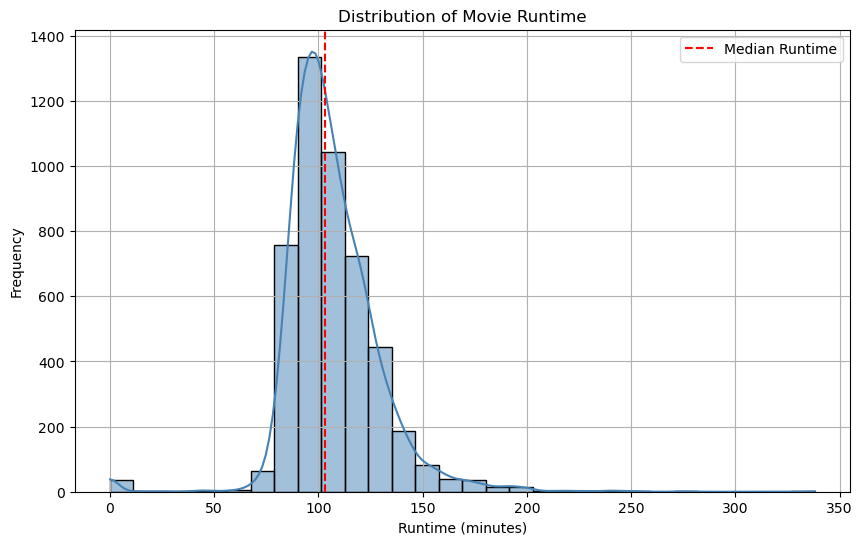

In [18]:
# Runtime Histogram Code
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins= 30, kde= True, color='steelblue')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(df['runtime'].median(), color='red', linestyle='--', label='Median Runtime')
plt.grid(True)
plt.legend()
plt.show()


The distribution of the movie runtime is skewed to the right hence filling the missing value with medium works

In [19]:
# Impute missing runtime with median
median_runtime = df['runtime'].median()
df['runtime'].fillna(median_runtime, inplace=True)
df['runtime'].isnull().sum()  # Should be 0 after imputation

C:\Users\HomePC\AppData\Local\Temp\ipykernel_28632\3062105754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(median_runtime, inplace=True)


0

In [20]:
missing_release = df[df['release_date'].isnull()]
missing_release

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
4553,0,[],en,America Is Still the Place,0.0,[],[],NaN,0,0.0,Released,0.0,0,[],[]


we will drop the single row with the missing date entry


In [21]:
# Drop row with missing release_date
df = df[df['release_date'].notnull().copy()]
df.isnull().sum()

budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [22]:
# 5. Function to display unique values for each object (categorical) column
def unique_values(df, max_unique= 25):
    object_col = df.select_dtypes(include= "object").columns
    for col in object_col:
        unique_vals = df[col].nunique()
        print(f"\n'{col}' - {unique_vals} unique values")
        if unique_vals <= max_unique:
            print(df[col].unique())
        else:
            print(f"Too many to display (> {max_unique})")

unique_values(df)


'genres' - 1175 unique values
Too many to display (> 25)

'original_language' - 37 unique values
Too many to display (> 25)

'original_title' - 4800 unique values
Too many to display (> 25)

'production_companies' - 3697 unique values
Too many to display (> 25)

'production_countries' - 469 unique values
Too many to display (> 25)

'release_date' - 3280 unique values
Too many to display (> 25)

'status' - 3 unique values
['Released' 'Post Production' 'Rumored']

'cast' - 4761 unique values
Too many to display (> 25)

'crew' - 4776 unique values
Too many to display (> 25)


In [23]:
df.dtypes

budget                    int64
genres                   object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
status                   object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

# Target Variable: Revenue Distribution

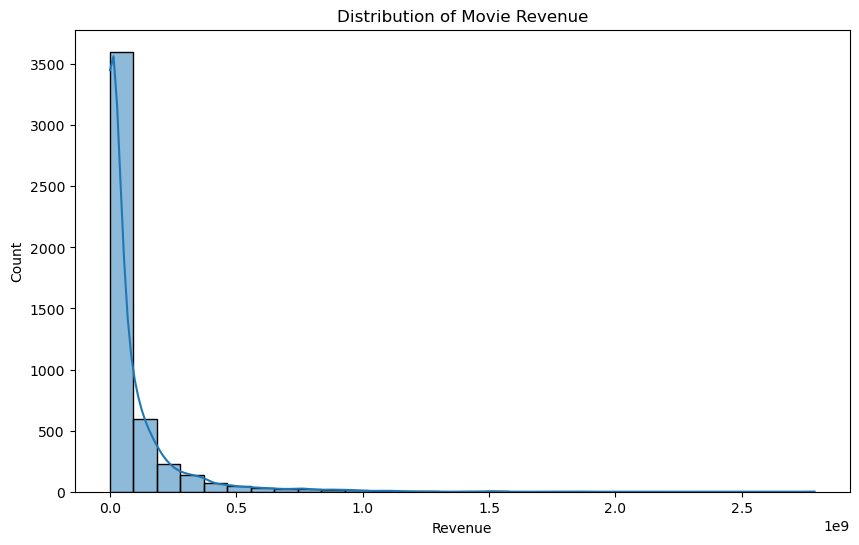

In [24]:
# plotting the distribution of the target variable 'revenue'
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], bins= 30, kde= True)
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


revenue is heavily skewed to the right

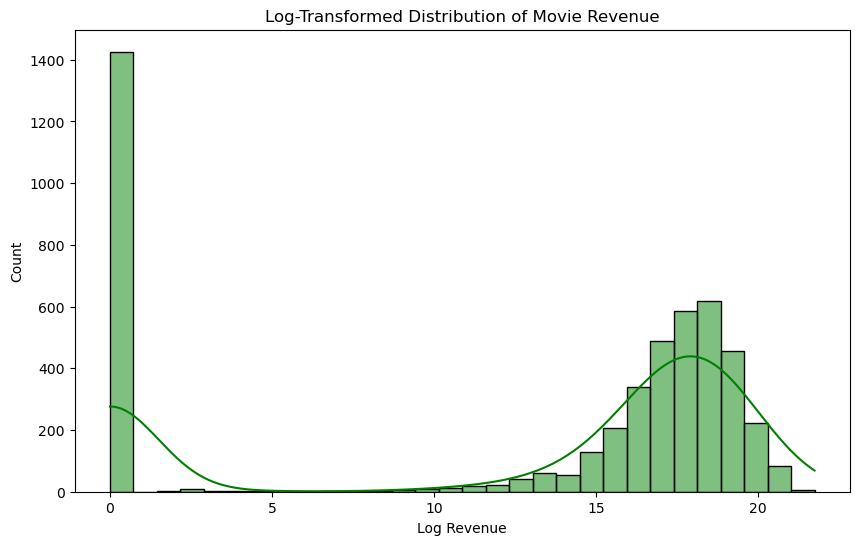

In [25]:
import numpy as np
# log transformation of revenue
df['log_revenue'] = np.log1p(df['revenue'])

plt.figure(figsize=(10, 6))
sns.histplot(df['log_revenue'], bins= 30, kde= True, color= 'green')
plt.title('Log-Transformed Distribution of Movie Revenue')
plt.xlabel('Log Revenue')
plt.ylabel('Count')
plt.show()

An improvement in the distribution wuth the lower values more dominant

# 🎬 Interpretation of Log-Transformed Movie Revenue Distribution

## 🔍 Overview
The histogram displays the **log-transformed distribution of movie revenue** for over 4,800 films. The original revenue values were highly **right-skewed**, meaning a small number of movies earned massive box office returns, while most earned relatively little. To address this skew and make the data more analyzable, a **natural logarithmic transformation** was applied to the `revenue` column.

---

## 📈 Why Log Transform?
- **Revenue is right-skewed**: A few blockbusters earn hundreds of millions or even billions, pulling the distribution far to the right.
- **Log transformation compresses extreme values**, spreading the lower values apart and pulling in the long tail — making the distribution more symmetric.
- This transformation makes it easier to apply models (like linear regression) that assume **normality** or **homoscedasticity** (constant variance).

> ℹ️ The log function used is `ln(x)` or `log(x + 1)` to handle zero revenue values.

---

## 📊 Key Observations in the Plot

### 1. **Bimodal Distribution**
- The histogram shows **two clear peaks**, suggesting a **bimodal** pattern:
  - **Peak 1 (Log Revenue ≈ 0–1)**:
    - Represents movies with very low or zero revenue.
    - Includes flops, limited releases, or missing/incomplete revenue data.
  - **Peak 2 (Log Revenue ≈ 17–19)**:
    - Represents commercially successful films — moderate to high earners.
    - This peak is broader and somewhat bell-shaped, indicating natural variation among successful films.

### 2. **Low Density Zone (Log Revenue ≈ 5–15)**
- There's a **notable dip** in this mid-range revenue zone.
- Suggests relatively few movies fall in the "middle class" of box office earnings.
- Could reflect a "barbell" distribution in the industry: **very successful** vs. **very unsuccessful** films, with fewer in between.

### 3. **KDE Curve**
- The green **Kernel Density Estimate** visually emphasizes the bimodal nature of the data, smoothing out the histogram to reveal underlying trends.

---

# Key Numeric Predictors
We visualize the relationships between revenue and key numeric features:

budget

popularity

runtime

vote_average

vote_count

In [26]:
df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue'],
      dtype='object')

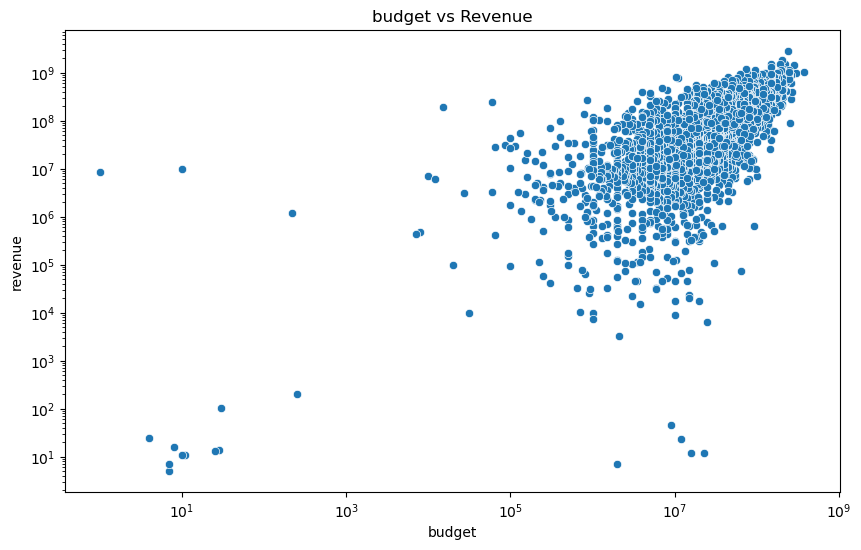

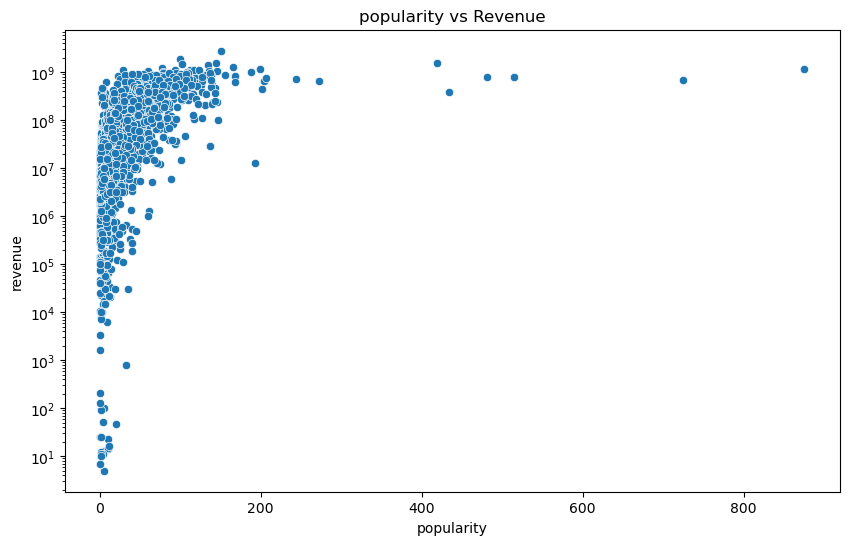

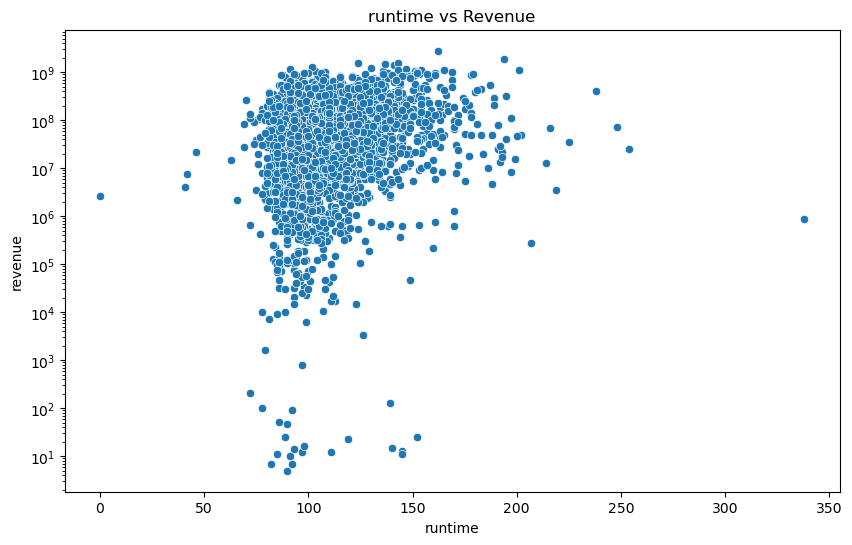

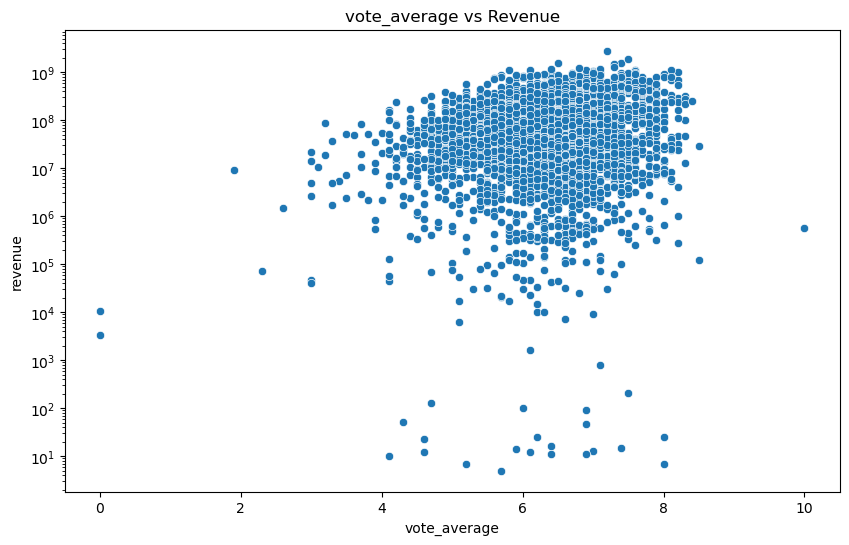

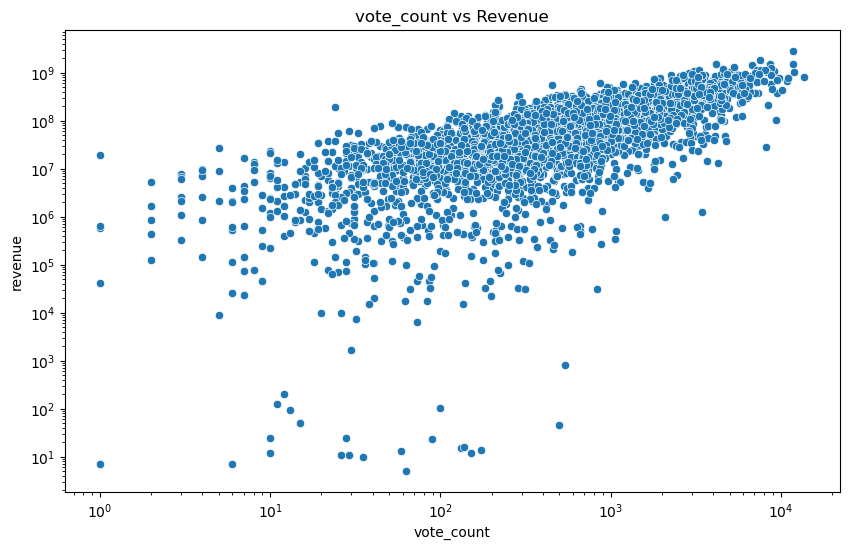

In [27]:
numeric_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

for feature in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data= df, x= feature, y= 'revenue')
    plt.title(f'{feature} vs Revenue')
    plt.xscale('log') if feature in ['budget', 'vote_count'] else None
    plt.yscale('log')
    plt.show()

# 📊 Relationship Between Numerical Features and Revenue

The scatterplots below illustrate how key numerical features relate to `revenue`, after applying log scaling (where appropriate) to handle skew and improve interpretability.

---

## 1. **Budget vs Revenue**
- **Observation**: There is a clear **positive correlation** between budget and revenue.
- **Interpretation**: As production budget increases, revenue also tends to increase. This aligns with the expectation that larger budgets often support better marketing, bigger stars, and wider releases.
- **Caveat**: Some high-budget films still result in low revenue — possibly flops or delayed releases.

---

## 2. **Popularity vs Revenue**
- **Observation**: Interestingly, many movies with **lower popularity scores** still report **high revenue**.
- **Interpretation**: Popularity (as defined in the TMDB dataset) might not be a direct proxy for box office success. It could be influenced by user activity or recent interest rather than actual performance.
- **Note**: There appears to be a weak or **non-linear** relationship overall.

---

## 3. **Runtime vs Revenue**
- **Observation**: Revenue tends to be highest for movies with **runtimes between 100 and 200 minutes**.
- **Outliers**: A few unusually long movies (~350 mins) appear as outliers with modest revenue.
- **Interpretation**: While longer runtimes may indicate epic or high-production-value films, excessively long durations could limit theatrical showings and reduce revenue.

---

## 4. **Vote Average vs Revenue**
- **Observation**: A general **positive trend** is visible — higher vote averages are associated with higher revenue.
- **Interpretation**: Critically acclaimed or well-reviewed films are more likely to attract larger audiences, leading to stronger box office returns.
- **Limitation**: There is some noise — not all highly rated movies are top earners.

---

## 5. **Vote Count vs Revenue**
- **Observation**: There is a **strong positive relationship** between vote count and revenue.
- **Interpretation**: Movies with more votes are generally more widely seen, suggesting that vote count can act as a proxy for audience size and commercial exposure.

---

## ✅ Summary

| Feature         | Correlation with Revenue | Notes                                                  |
|----------------|---------------------------|--------------------------------------------------------|
| Budget          | Strong Positive           | More budget generally = more revenue                  |
| Popularity      | Weak/No Clear Pattern     | Some high earners have low popularity                 |
| Runtime         | Positive (100–200 mins)   | Optimal zone exists; outliers beyond 3 hours          |
| Vote Average    | Moderate Positive         | Higher rated films tend to earn more                  |
| Vote Count      | Strong Positive           | High vote count strongly aligned with revenue         |



# Categorical Features

In [28]:

df.dtypes

budget                    int64
genres                   object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
status                   object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
log_revenue             float64
dtype: object

In [29]:

df.release_date.head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [30]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df.release_date, errors='coerce')
df['release_year'] = df.release_date.dt.year
df['release_month'] = df.release_date.dt.month



In [31]:

df.genres.head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [32]:
import ast
# Top genres extraction

df['genres_list'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if pd.notnull(x) else [])
df['main_genre'] = df['genres_list'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')



In [33]:
df.genres_list.head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres_list, dtype: object

In [34]:

df.main_genre.head()

0       Action
1    Adventure
2       Action
3       Action
4       Action
Name: main_genre, dtype: object

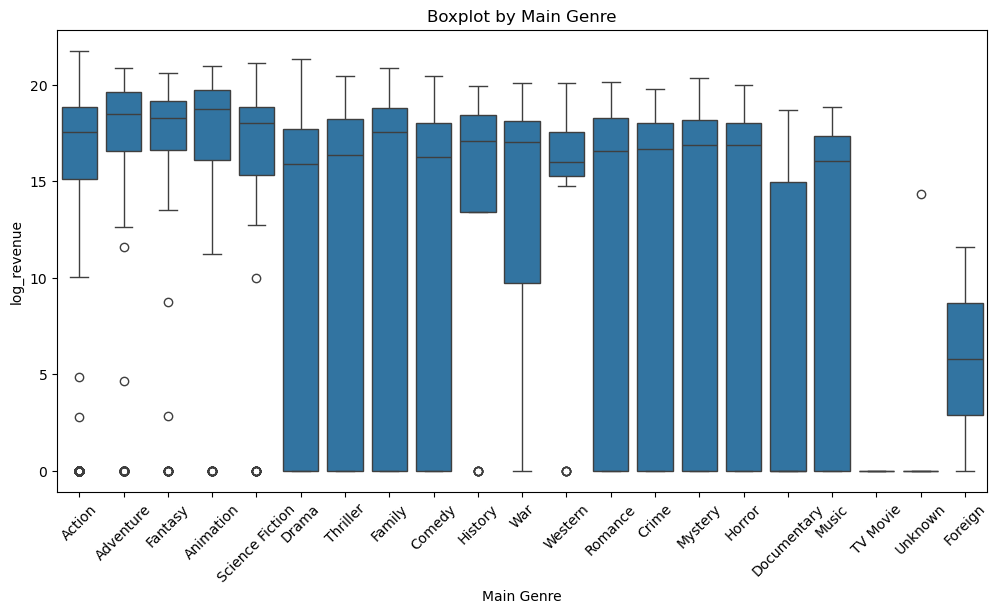

In [35]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='main_genre', y='log_revenue')
plt.xticks(rotation= 45)
plt.title('Boxplot by Main Genre')
plt.xlabel('Main Genre')
plt.show()


In [36]:
df.original_language.value_counts()

original_language
en    4504
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

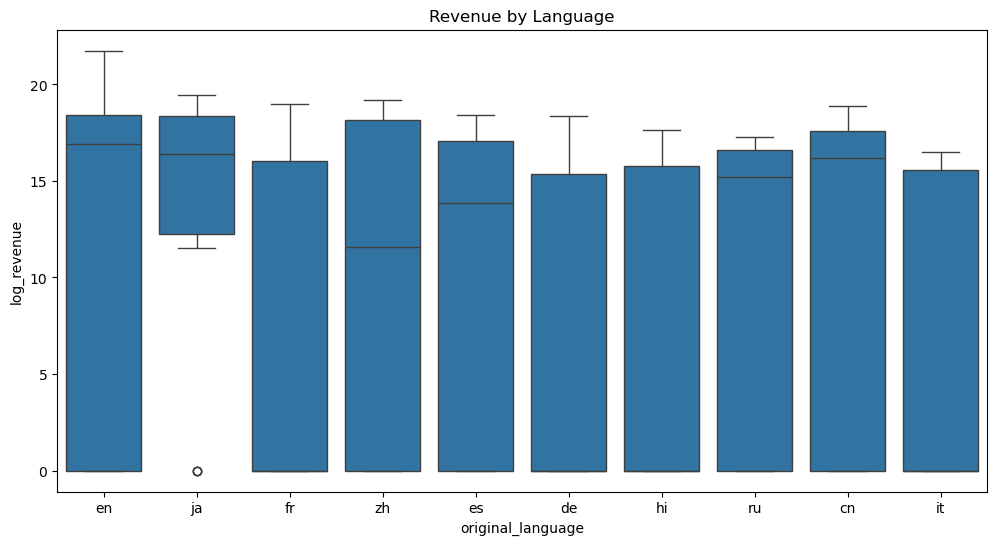

In [37]:
plt.figure(figsize=(12, 6))
top_lang = df['original_language'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['original_language'].isin(top_lang)], x='original_language', y='log_revenue')
plt.title('Revenue by Language')
plt.show()


## 🎬 Genre-wise Revenue Interpretation

- **Action, Adventure, Fantasy, and Science Fiction** genres tend to yield the highest revenue.  
- **TV Movie** and **Unknown** categories show **minimal profitability**.
- **Foreign** films generally have **lower revenue**, although there are a few **notable outliers** with high returns.

## 🌍 Language-wise Revenue Interpretation

- **English** is overwhelmingly the **dominant language** in terms of revenue, reflecting its global cinematic influence.
- Other high-performing languages include **Chinese**, **Japanese**, and **French**, but they lag far behind English in terms of overall market share and revenue potential.


In [38]:
df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue', 'release_year', 'release_month', 'genres_list',
       'main_genre'],
      dtype='object')

In [39]:
df[['log_revenue', 'revenue']].head()

,log_revenue,revenue
0,21.748578,2787965087
1,20.683485,961000000
2,20.596199,880674609
3,20.804790,1084939099
4,19.464974,284139100


In [40]:
# Add log_budget column
df['log_budget'] = np.log1p(df['budget'])
df[['log_budget', 'budget']].head()

,log_budget,budget
0,19.283571,237000000
1,19.519293,300000000
2,19.316769,245000000
3,19.336971,250000000
4,19.376192,260000000


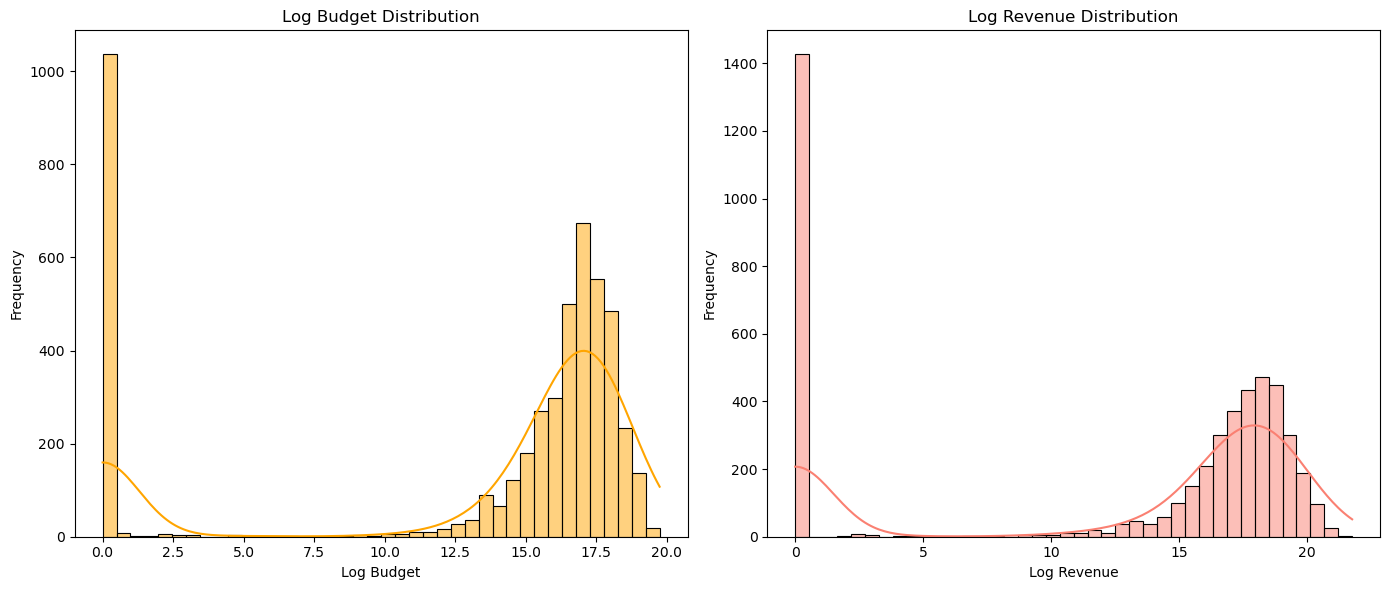

In [41]:
plt.figure(figsize= (14, 6))

# histogram of log_budget
plt.subplot(1, 2, 1)
sns.histplot(df.log_budget, bins= 40, kde= True, color='orange')
plt.title('Log Budget Distribution')
plt.xlabel('Log Budget')
plt.ylabel('Frequency')

# histogram of log_revenue
plt.subplot(1, 2, 2)
sns.histplot(df.log_revenue, bins= 40, kde= True, color='salmon')
plt.title('Log Revenue Distribution')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

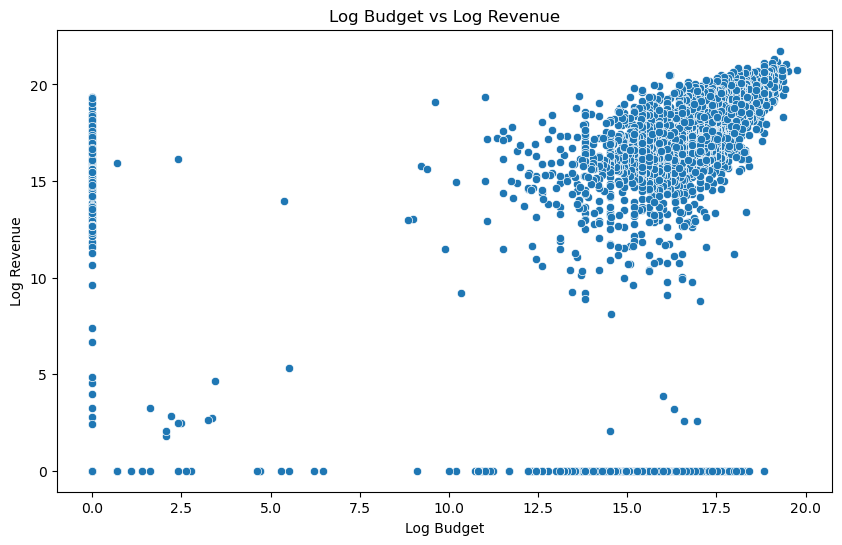

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_budget', y='log_revenue')
plt.title('Log Budget vs Log Revenue')
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.show()

### Interpretation: `log_budget` vs `log_revenue` Distributions

Both histograms reflect a **"winner-take-all"** or **blockbuster-driven** pattern in the film industry:

- A **large number of films** are produced with **very low budgets** and yield **minimal revenue** — this forms the **first peak** in the distributions.
- A **smaller but crucial segment** of films receive **higher budgets** and generate **substantially more revenue**, forming a **second peak**.
- This **bimodal distribution** highlights the industry’s **dependency on a few blockbuster hits** to drive profitability — a small percentage of films dominate box office returns.
- A scatter plot for budget against revenue also supports this showing how as the budget increases, the revenue also increases

Correlation Matrix (Pearson)

To understand how key numeric features relate to each other and to `log_revenue`, we will compute a **Pearson correlation matrix**.

🧮 Features Included:
- `budget`
- `popularity`
- `runtime`
- `vote_average`
- `vote_count`
- `log_budget`
- `log_revenue`


In [43]:
df.dtypes

budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
status                          object
vote_average                   float64
vote_count                       int64
cast                            object
crew                            object
log_revenue                    float64
release_year                     int32
release_month                    int32
genres_list                     object
main_genre                      object
log_budget                     float64
dtype: object

In [44]:
features = ['log_budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'log_revenue']
corr_matrix = df[features].corr(method= 'pearson').round(2)
corr_matrix

,log_budget,popularity,runtime,vote_average,vote_count,log_revenue
log_budget,1.00,0.33,0.25,0.21,0.32,0.70
popularity,0.33,1.00,0.23,0.27,0.78,0.41
runtime,0.25,0.23,1.00,0.37,0.27,0.27
vote_average,0.21,0.27,0.37,1.00,0.31,0.29
vote_count,0.32,0.78,0.27,0.31,1.00,0.41
log_revenue,0.70,0.41,0.27,0.29,0.41,1.00


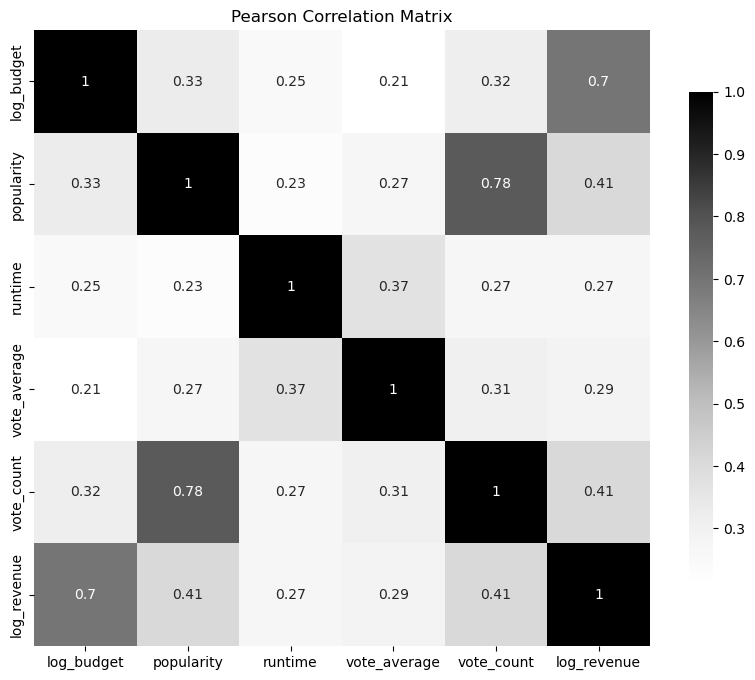

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True, cmap= 'Greys', square= True, cbar_kws= {'shrink': 0.8})
plt.title("Pearson Correlation Matrix")
plt.show()

## Correlation Matrix Interpretation

The Pearson correlation matrix reveals the following key insights:

- `log_budget` shows the **strongest positive correlation** with `log_revenue` (**r = 0.70**), confirming the intuitive link between higher budgets and higher revenues.
- `vote_count` and `popularity` are **moderately correlated** with revenue (both **r ≈ 0.41**), reflecting how audience reach and engagement relate to earnings.
- `runtime` and `vote_average` show **weaker but still positive relationships** with `log_revenue`, suggesting some influence but likely indirect.
- Strong inter-feature correlation is also noted between `vote_count` and `popularity` (**r = 0.78**), potentially indicating multicollinearity risk during modeling.


In [46]:
df[['vote_average', 'vote_count', 'popularity']].head()

,vote_average,vote_count,popularity
0,7.2,11800,150.437577
1,6.9,4500,139.082615
2,6.3,4466,107.376788
3,7.6,9106,112.312950
4,6.1,2124,43.926995


drop one in feature engineering


## Outlier Detection

Outliers can distort model learning, especially in regression. We visualize the distribution of `log_revenue` against key predictors to identify potential high-leverage points.


### Boxplots of Predictors vs. `log_revenue`

In [47]:
features


['log_budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'log_revenue']

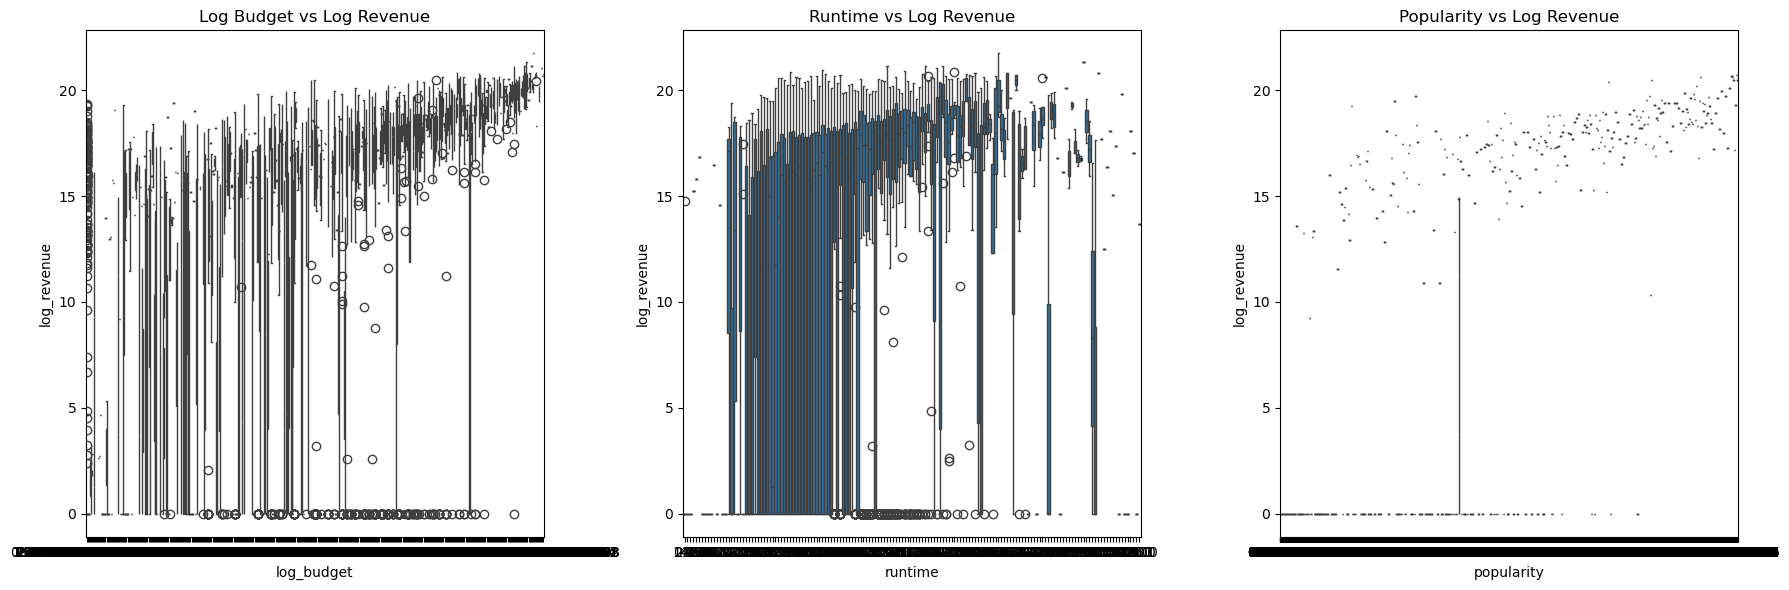

In [48]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# log_budget vs log_revenue
sns.boxplot(ax= axs[0], x= df.log_budget, y= df.log_revenue)
axs[0].set_title('Log Budget vs Log Revenue')

# runtime vs log_revenue
sns.boxplot(ax= axs[1], x= df.runtime, y= df.log_revenue)
axs[1].set_title('Runtime vs Log Revenue')

# Popularity vs log_revenue
# popularity vs log_revenue
sns.boxplot(ax=axs[2], x=df['popularity'], y=df['log_revenue'])
axs[2].set_title('Popularity vs Log Revenue')

plt.tight_layout()
plt.show()

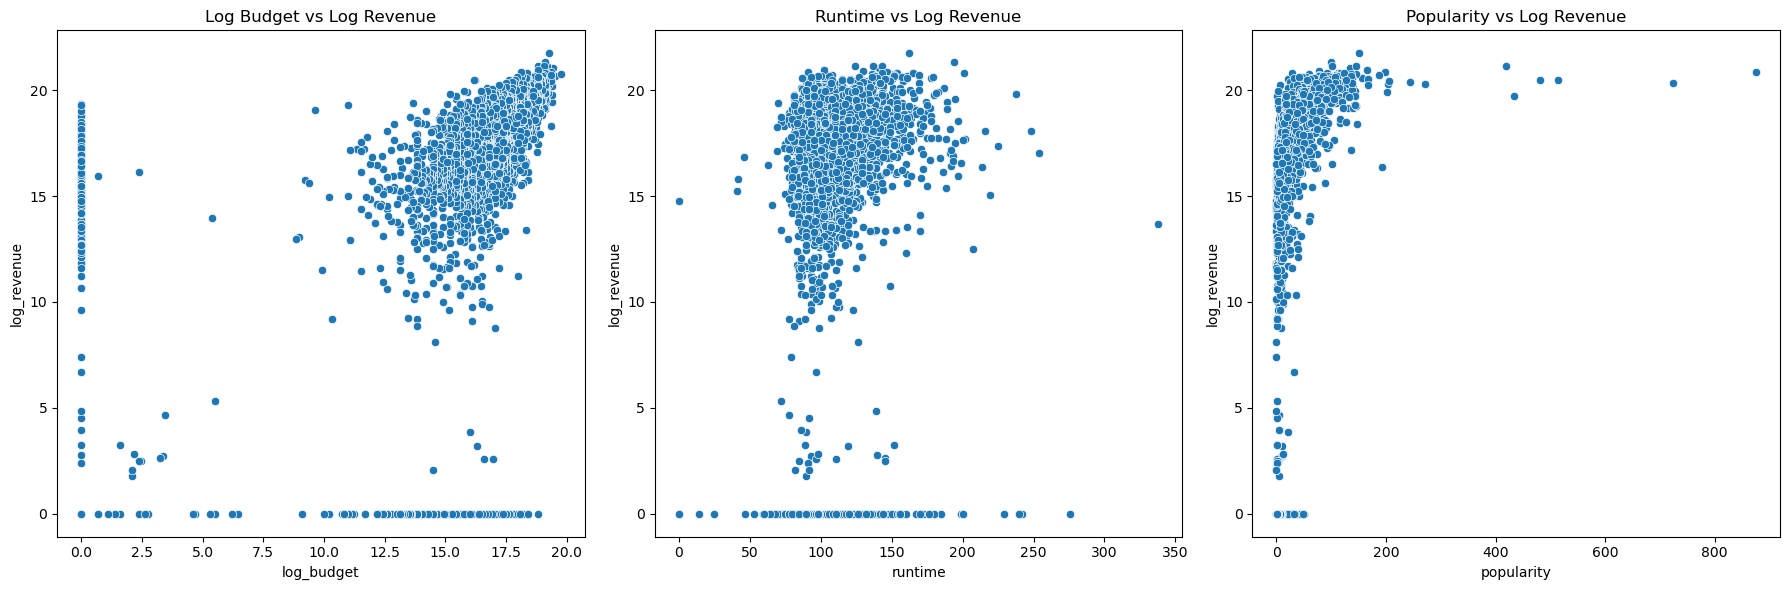

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(ax=axs[0], x='log_budget', y='log_revenue', data=df)
axs[0].set_title('Log Budget vs Log Revenue')

sns.scatterplot(ax=axs[1], x='runtime', y='log_revenue', data=df)
axs[1].set_title('Runtime vs Log Revenue')

sns.scatterplot(ax=axs[2], x='popularity', y='log_revenue', data=df)
axs[2].set_title('Popularity vs Log Revenue')

plt.tight_layout()
plt.show()

In [50]:
# Calculate 99th percentile threshold
threshold = df['log_revenue'].quantile(0.99)

# Flag top 1% as outliers
df['is_outlier'] = df['log_revenue'] > threshold

# Count of outliers
print(f"Top 1% revenue outliers: {df['is_outlier'].sum()} rows flagged.")


Top 1% revenue outliers: 49 rows flagged.


### Outlier Detection

To understand the influence of extreme values on the distribution and correlation structure, we performed outlier detection based on `log_revenue`.

#### Boxplots

We plotted boxplots of `log_revenue` against:

- `log_budget`
- `runtime`
- `popularity`

These visualizations revealed the presence of extreme values on the higher end of the revenue scale — consistent with blockbuster films generating disproportionately high income.

#### Scatter Plots

Scatter plots between `log_revenue` and:

- `log_budget`
- `runtime`
- `popularity`

showed several data points deviating significantly from the general trend, suggesting the presence of influential high-revenue observations.

#### Flagging Outliers

To quantify this, the top 1% of `log_revenue` values were flagged as outliers.  
**Number of rows flagged: 49**

These outliers represent blockbuster films whose performance may skew model learning if not handled properly during feature engineering or model training.


In [51]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,...,vote_count,cast,crew,log_revenue,release_year,release_month,genres_list,main_genre,log_budget,is_outlier
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,...,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",21.748578,2009,12,"[Action, Adventure, Fantasy, Science Fiction]",Action,19.283571,True
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,...,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",20.683485,2007,5,"[Adventure, Fantasy, Action]",Adventure,19.519293,True
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,...,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",20.596199,2015,10,"[Action, Adventure, Crime]",Action,19.316769,True
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,...,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",20.804790,2012,7,"[Action, Crime, Drama, Thriller]",Action,19.336971,True
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,...,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",19.464974,2012,3,"[Action, Adventure, Science Fiction]",Action,19.376192,False


In [52]:
df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue', 'release_year', 'release_month', 'genres_list',
       'main_genre', 'log_budget', 'is_outlier'],
      dtype='object')

In [53]:
df.shape

(4802, 22)

In [54]:
df.crew


0       [{"credit_id": "52fe48009251416c750aca23", "de...
1       [{"credit_id": "52fe4232c3a36847f800b579", "de...
2       [{"credit_id": "54805967c3a36829b5002c41", "de...
3       [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4       [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
                              ...                        
4798    [{"credit_id": "52fe44eec3a36847f80b280b", "de...
4799    [{"credit_id": "52fe487dc3a368484e0fb013", "de...
4800    [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...
4801    [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...
4802    [{"credit_id": "58ce021b9251415a390165d9", "de...
Name: crew, Length: 4802, dtype: object

In [55]:
df.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

## 🎯 Objective

Build a refined, minimal, and meaningful feature set to predict `log_revenue` using pre-release movie metadata.

---

## 🔧 Feature Engineering Framework

### 1. Remove Unusable / Leakage Columns

These provide no predictive value or are not known before release.

| Column              | Action | Reason                                         |
|---------------------|--------|------------------------------------------------|
| original_title      | Drop   | Not predictive, high cardinality text         |
| revenue             | Drop   | Target leakage                                |
| log_revenue         | Keep   | Target variable                               |
| is_outlier          | Keep   | Use for training strategy only                |
| status              | Drop   | Mostly one value ("Released")                 |
| popularity          | Drop   | Ambiguous definition                          |

➡️ Action: Drop original_title, revenue, status, popularity

---

### 2. Handle Numerical Features

| Feature       | Action        | Notes                                           |
|---------------|---------------|-------------------------------------------------|
| budget        | Drop          | Redundant                                      |
| log_budget    | Keep          | Normalized version                             |
| vote_average  | Keep          | Numeric indicator of perceived quality         |
| vote_count    | Keep          | Chosen over popularity                         |
| runtime       | Keep          | Consider imputation if missing                 |

---

### 3. Handle Categorical and Structured Features

| Feature                 | Action                        | Notes                                              |
|--------------------------|-------------------------------|----------------------------------------------------|
| original_language       | One-hot top N                 | Group rest as "Other"                              |
| production_companies    | Create binary or count        | Flag major studios or count number of companies    |
| production_countries    | US vs Non-US dummy            | Or count of countries                              |
| genres_list             | Multi-hot encode              | Binary columns for each genre                      |
| main_genre              | One-hot encode                | Single dominant genre                              |
| release_date            | Drop                          | Redundant                                          |
| release_year            | Keep                          | Useful temporal feature                            |
| release_month           | Keep                          | Useful temporal feature                            |
| crew                    | Extract director              | Director likely has strong influence               |
| cast                    | Extract top-billed actor      | Use actor with order = 0                           |

---

### 4. Optional Feature Creation (Minimal)

| New Feature      | Description                             |
|------------------|-----------------------------------------|
| num_genres       | Count of genres                         |
| is_english       | Binary: is original_language English    |
| is_US_produced   | Binary: contains US in production_countries |
| is_major_studio  | Binary flag for major studios           |
| budget_per_min   | log_budget / runtime                    |

➡️ Only create these if model performance stagnates or they’re justified by EDA.

---

## 📦 Final Candidate Features for Modeling

| Type         | Features                                                                 |
|--------------|--------------------------------------------------------------------------|
| Numeric      | log_budget, runtime, vote_average, vote_count, release_year, release_month |
| Binary       | is_english, is_US_produced, is_major_studio, is_outlier                  |
| Categorical  | main_genre (one-hot), original_language (top N one-hot)                 |
| Multi-label  | genres_list (multi-hot)                                                  |
| Extracted    | director_name, lead_actor_name                                           |


# Step 1: Extract Key People
From crew, extract the director (where job == "Director")

From cast, extract the lead actor (where order == 0)

In [56]:

df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue', 'release_year', 'release_month', 'genres_list',
       'main_genre', 'log_budget', 'is_outlier'],
      dtype='object')

In [57]:
df['crew_parsed'] = df['crew'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df['cast_parsed'] = df['cast'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# extract director names
def get_director(crew_list):
    for member in crew_list:
        if member.get('job') == 'Director':
            return member.get('name')
    return None

# Extract Lead Actor/Actress
def get_lead_actor(cast_list):
    for actor in cast_list:
        if actor.get('order') == 0:
            return actor.get('name')
    return None

# Apply the functions to create new columns
df['director'] = df['crew_parsed'].apply(get_director)
df['lead_actor'] = df['cast_parsed'].apply(get_lead_actor)

# Drop temporary parsed columns
df.drop(columns= ['crew_parsed', 'cast_parsed'], inplace=True)

# Display the first few rows to verify
print("Directors and Lead Actors extracted:")
df[['director', 'lead_actor']].head()


Directors and Lead Actors extracted:


,director,lead_actor
0,James Cameron,Sam Worthington
1,Gore Verbinski,Johnny Depp
2,Sam Mendes,Daniel Craig
3,Christopher Nolan,Christian Bale
4,Andrew Stanton,Taylor Kitsch


In [58]:
df.director.unique()


array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'Scott Smith', 'Daniel Hsia', 'Brian Herzlinger'], dtype=object)

In [59]:
df.lead_actor.unique()

array(['Sam Worthington', 'Johnny Depp', 'Daniel Craig', ...,
       'Carlos Gallardo', 'Eric Mabius', 'Daniel Henney'], dtype=object)

In [60]:
num_unique_directors = df['director'].nunique()
num_unique_lead_actors = df['lead_actor'].nunique()

print(f"Number of unique directors: {num_unique_directors}")
print(f"Number of unique lead actors: {num_unique_lead_actors}")

Number of unique directors: 2349
Number of unique lead actors: 1971


In [61]:
df.shape

(4802, 24)

In [62]:
top_directors = df['director'].value_counts().nlargest(30).index
df['director'] = df['director'].apply(lambda x: x if x in top_directors else 'Other')

top_actors = df['lead_actor'].value_counts().nlargest(30).index
df['lead_actor'] = df['lead_actor'].apply(lambda x: x if x in top_actors else 'Other')


In [63]:
print("Top Actors: ", top_actors.unique())
print("Top Directors: ", top_directors.unique())

Top Actors:  Index(['Robert De Niro', 'Bruce Willis', 'Nicolas Cage', 'Johnny Depp',
       'Denzel Washington', 'Tom Hanks', 'Tom Cruise', 'Arnold Schwarzenegger',
       'Matt Damon', 'Adam Sandler', 'George Clooney', 'Ben Stiller',
       'John Travolta', 'Eddie Murphy', 'Jim Carrey', 'Sylvester Stallone',
       'Sandra Bullock', 'Mark Wahlberg', 'Harrison Ford', 'Kevin Costner',
       'Sean Connery', 'Will Ferrell', 'Robin Williams', 'Brad Pitt',
       'Leonardo DiCaprio', 'Keanu Reeves', 'Ben Affleck', 'Meryl Streep',
       'Christian Bale', 'Dwayne Johnson'],
      dtype='object', name='lead_actor')
Top Directors:  Index(['Steven Spielberg', 'Woody Allen', 'Martin Scorsese', 'Clint Eastwood',
       'Ridley Scott', 'Spike Lee', 'Robert Rodriguez', 'Steven Soderbergh',
       'Renny Harlin', 'Oliver Stone', 'Tim Burton', 'Robert Zemeckis',
       'Joel Schumacher', 'Barry Levinson', 'Ron Howard', 'Tony Scott',
       'Brian De Palma', 'Kevin Smith', 'Francis Ford Coppola', 'Mi

In [64]:
top_actors.nunique()

30

In [65]:
top_directors.nunique()

30

In [66]:
df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue', 'release_year', 'release_month', 'genres_list',
       'main_genre', 'log_budget', 'is_outlier', 'director', 'lead_actor'],
      dtype='object')

In [67]:
df.production_countries.unique()

array(['[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]',
       '[{"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "JM", "name": "Jamaica"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "BS", "name": "Bahamas"}, {"iso_3166_1": "DM", "name": "Dominica"}]',
       '[{"iso_3166_1": "CZ", "name": "Czech Republic"}, {"iso_3166_1": "PL", "name": "Poland"}, {"iso_3166_1": "SI", "name": "Slovenia"}, {"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}]',
       '[{"iso_3166_1": "NZ", "name": "New Zealand"}, {"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "DE", "name": "Germany"}]',
       '[{"iso_3166_1": "CN", "name"

In [68]:
df.production_companies.unique()

array(['[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]',
       '[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]',
       '[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]',
       ...,
       '[{"name": "Asylum Films", "id": 10571}, {"name": "FM Entertainment", "id": 26598}, {"name": "Eagle Eye Films Inc.", "id": 40739}]',
       '[{"name": "Front Street Pictures", "id": 3958}, {"name": "Muse Entertainment Enterprises", "id": 6438}]',
       '[{"name": "rusty bear entertainment", "id": 87986}, {"name": "lucky crow films", "id": 87987}]'],
      dtype=object)

In [69]:
df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Feature Selection & Dropping
Now that we’ve identified the final set of features for our predictive model, we proceed to drop all irrelevant or redundant columns. This step simplifies the dataset and ensures our model only learns from meaningful variables. The selected features include a mix of numeric, categorical, and engineered fields that are expected to have predictive power for movie revenue.

In [70]:
final_features = [ 'log_budget',
    'log_revenue',         # Target variable
    'release_year',
    'release_month',
    'main_genre',
    'vote_average',
    'vote_count',
    'runtime',
    'director',
    'lead_actor',
    'original_language',   
    'production_countries',
    'production_companies' 
]

df2 = df[final_features].copy()

In [71]:
df2.head()

,log_budget,log_revenue,release_year,release_month,main_genre,vote_average,vote_count,runtime,director,lead_actor,original_language,production_countries,production_companies
0,19.283571,21.748578,2009,12,Action,7.2,11800,162.0,Other,Other,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,19.519293,20.683485,2007,5,Adventure,6.9,4500,169.0,Other,Johnny Depp,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,19.316769,20.596199,2015,10,Action,6.3,4466,148.0,Other,Other,en,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
3,19.336971,20.804790,2012,7,Action,7.6,9106,165.0,Other,Christian Bale,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."
4,19.376192,19.464974,2012,3,Action,6.1,2124,132.0,Other,Other,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [72]:
df2.dtypes

log_budget              float64
log_revenue             float64
release_year              int32
release_month             int32
main_genre               object
vote_average            float64
vote_count                int64
runtime                 float64
director                 object
lead_actor               object
original_language        object
production_countries     object
production_companies     object
dtype: object

In [73]:
df2.shape

(4802, 13)

In [74]:
df2.to_csv('movies_features.csv', index=False)

## Extract the First Country (Most Common)
The assumption is that the first country listed is the primary production location, which often has the biggest impact on budget, cast, and distribution.

In [75]:
def extract_primary_country(cell):
    try:
        countries = ast.literal_eval(cell)
        if countries and isinstance(countries, list):
            return countries[0]['name']
    except Exception:
        return None
    

df2['primary_country'] = df2['production_countries'].apply(extract_primary_country)
df2['primary_country'].head()

0    United States of America
1    United States of America
2              United Kingdom
3    United States of America
4    United States of America
Name: primary_country, dtype: object

In [76]:
df2['primary_country'].unique()

array(['United States of America', 'United Kingdom', 'Jamaica',
       'Czech Republic', 'New Zealand', 'China', 'Canada', 'Germany',
       'Japan', 'France', 'Australia', 'Italy', 'Spain', 'India',
       'Belgium', None, 'Hong Kong', 'Norway', 'Ireland', 'South Africa',
       'Mexico', 'Malaysia', 'Finland', 'Iceland', 'Denmark',
       'Philippines', 'Russia', 'Bulgaria', 'Switzerland',
       'United Arab Emirates', 'Malta', 'South Korea', 'Brazil', 'Peru',
       'Netherlands', 'Bosnia and Herzegovina', 'Luxembourg', 'Romania',
       'Singapore', 'Aruba', 'Libyan Arab Jamahiriya', 'Hungary',
       'Argentina', 'Panama', 'Austria', 'Greece', 'Sweden', 'Thailand',
       'Fiji', 'Bahamas', 'Turkey', 'Cyprus', 'Bolivia', 'Morocco',
       'Ecuador', 'Poland', 'Israel', 'Bhutan', 'Lebanon',
       'Kyrgyz Republic', 'Algeria', 'Indonesia', 'Guyana', 'Pakistan',
       'Guadaloupe', 'Iran', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'Kenya'], dtype=object)

### Simplifying Production Companies

The `production_companies` column contains lists of production companies involved in each movie, with each entry represented as a dictionary containing a `name` and an `id`. Since some movies are associated with multiple companies, we simplify this feature by extracting the primary production company based on the company with the lowest ID. This approach ensures consistency and prioritizes more established or central production companies.

A new feature, `primary_company`, is created to hold this simplified value for use in downstream modeling.


In [77]:
def primary_company(cell):
    try:
        companies = ast.literal_eval(cell)
        if isinstance(companies, list) and companies:
            primary_company = sorted(companies, key=lambda x: x['id'])[0]['name']
            return primary_company
    except (ValueError, SyntaxError, TypeError):
        pass
    return None

df2['primary_company'] = df2['production_companies'].apply(primary_company)
df2['primary_company'].head()

0    Ingenious Film Partners
1       Walt Disney Pictures
2          Columbia Pictures
3         Legendary Pictures
4       Walt Disney Pictures
Name: primary_company, dtype: object

In [78]:
df2['primary_company'].nunique()

1313

In [79]:
df2.head()

,log_budget,log_revenue,release_year,release_month,main_genre,vote_average,vote_count,runtime,director,lead_actor,original_language,production_countries,production_companies,primary_country,primary_company
0,19.283571,21.748578,2009,12,Action,7.2,11800,162.0,Other,Other,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",United States of America,Ingenious Film Partners
1,19.519293,20.683485,2007,5,Adventure,6.9,4500,169.0,Other,Johnny Depp,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",United States of America,Walt Disney Pictures
2,19.316769,20.596199,2015,10,Action,6.3,4466,148.0,Other,Other,en,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",United Kingdom,Columbia Pictures
3,19.336971,20.804790,2012,7,Action,7.6,9106,165.0,Other,Christian Bale,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",United States of America,Legendary Pictures
4,19.376192,19.464974,2012,3,Action,6.1,2124,132.0,Other,Other,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",United States of America,Walt Disney Pictures


In [80]:
df2.drop(columns=['production_countries', 'production_companies'], inplace=True)
df2.head()

,log_budget,log_revenue,release_year,release_month,main_genre,vote_average,vote_count,runtime,director,lead_actor,original_language,primary_country,primary_company
0,19.283571,21.748578,2009,12,Action,7.2,11800,162.0,Other,Other,en,United States of America,Ingenious Film Partners
1,19.519293,20.683485,2007,5,Adventure,6.9,4500,169.0,Other,Johnny Depp,en,United States of America,Walt Disney Pictures
2,19.316769,20.596199,2015,10,Action,6.3,4466,148.0,Other,Other,en,United Kingdom,Columbia Pictures
3,19.336971,20.804790,2012,7,Action,7.6,9106,165.0,Other,Christian Bale,en,United States of America,Legendary Pictures
4,19.376192,19.464974,2012,3,Action,6.1,2124,132.0,Other,Other,en,United States of America,Walt Disney Pictures


In [81]:
df2.dtypes

log_budget           float64
log_revenue          float64
release_year           int32
release_month          int32
main_genre            object
vote_average         float64
vote_count             int64
runtime              float64
director              object
lead_actor            object
original_language     object
primary_country       object
primary_company       object
dtype: object

## Feature Simplification: Reducing Categorical Cardinality

This phase focuses on reducing the number of unique categories in high-cardinality categorical features. Machine learning models, particularly tree-based regressors, can be negatively affected by excessive category granularity, which may lead to overfitting and increased model complexity.

To address this, we identify object-type columns with many unique values and group infrequent categories under a common label such as "Other". This helps improve model generalization and training efficiency.

The categorical features targeted for simplification in this phase include:
- `main_genre`
- `original_language`
- `primary_country`
- `primary_company`
- `director`
- `lead_actor`

Each column will be analyzed based on frequency distribution, and a threshold (e.g., Top 10 or Top 20 frequent categories) will be applied to retain the most relevant categories while reducing noise from less common values.


In [82]:
df2.main_genre.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TV Movie', 'Unknown', 'Foreign'], dtype=object)

In [83]:
def print_unique_values(df):
    object_cols = df.select_dtypes(include= 'object')
    for col in object_cols.columns:
        print(f"\n Column: {col}")
        print(f"Unique values: {object_cols[col].unique()}")
        print(f"Number of Unique values: {object_cols[col].nunique()}")

print_unique_values(df2)


 Column: main_genre
Unique values: ['Action' 'Adventure' 'Fantasy' 'Animation' 'Science Fiction' 'Drama'
 'Thriller' 'Family' 'Comedy' 'History' 'War' 'Western' 'Romance' 'Crime'
 'Mystery' 'Horror' 'Documentary' 'Music' 'TV Movie' 'Unknown' 'Foreign']
Number of Unique values: 21

 Column: director
Unique values: ['Other' 'Sam Raimi' 'Ridley Scott' 'Tim Burton' 'Michael Bay'
 'Steven Spielberg' 'Robert Zemeckis' 'Martin Scorsese' 'Oliver Stone'
 'Shawn Levy' 'Ron Howard' 'Richard Donner' 'Chris Columbus'
 'Joel Schumacher' 'Steven Soderbergh' 'Tony Scott' 'Renny Harlin'
 'Brian De Palma' 'Paul W.S. Anderson' 'Barry Levinson' 'Bobby Farrelly'
 'Clint Eastwood' 'Robert Rodriguez' 'Rob Reiner' 'Joel Coen'
 'Francis Ford Coppola' 'Spike Lee' 'John Carpenter' 'Kevin Smith'
 'Woody Allen' 'Richard Linklater']
Number of Unique values: 31

 Column: lead_actor
Unique values: ['Other' 'Johnny Depp' 'Christian Bale' 'Ben Affleck' 'Mark Wahlberg'
 'Tom Hanks' 'Brad Pitt' 'Leonardo DiCaprio' 'Harr

### Simplifying `main_genre`

We begin with the `main_genre` column, which contains a variety of genres. To reduce its cardinality, we retain only the top N most frequent genres and group all others into a single category labeled `Other`.

This strategy preserves the most informative categories while minimizing the complexity introduced by rare or inconsistent genre labels.


In [84]:
df3 = df2.copy()

In [85]:
# Number of genres to retain
top = 10

# get top N most frequent genres
top_genres = df3.main_genre.value_counts().nlargest(top).index

# replace less frequent genres with 'Other'
df3['main_genre'] = df3['main_genre'].apply(lambda x: x if x in top_genres else 'Other')

# Check updated main_genre
df3.main_genre.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Other', 'Drama',
       'Thriller', 'Comedy', 'Romance', 'Crime', 'Horror'], dtype=object)

In [86]:
df3.dtypes

log_budget           float64
log_revenue          float64
release_year           int32
release_month          int32
main_genre            object
vote_average         float64
vote_count             int64
runtime              float64
director              object
lead_actor            object
original_language     object
primary_country       object
primary_company       object
dtype: object

In [87]:
df3.director.nunique()

31

In [88]:
df3.director.unique()

array(['Other', 'Sam Raimi', 'Ridley Scott', 'Tim Burton', 'Michael Bay',
       'Steven Spielberg', 'Robert Zemeckis', 'Martin Scorsese',
       'Oliver Stone', 'Shawn Levy', 'Ron Howard', 'Richard Donner',
       'Chris Columbus', 'Joel Schumacher', 'Steven Soderbergh',
       'Tony Scott', 'Renny Harlin', 'Brian De Palma',
       'Paul W.S. Anderson', 'Barry Levinson', 'Bobby Farrelly',
       'Clint Eastwood', 'Robert Rodriguez', 'Rob Reiner', 'Joel Coen',
       'Francis Ford Coppola', 'Spike Lee', 'John Carpenter',
       'Kevin Smith', 'Woody Allen', 'Richard Linklater'], dtype=object)

The **`director`** column contains 31 unique values, representing the different directors in the dataset.  
Given that 31 is a relatively small number of categories, **no reduction is needed at this stage**.  

**Rationale:**
- The number of unique directors is manageable for most encoding techniques.
- Directors can have a significant influence on a movie’s success, so preserving all categories may retain valuable predictive power.
- Grouping or reducing categories prematurely could remove important signals, especially for well-known directors.

In [89]:
df3.lead_actor.unique()

array(['Other', 'Johnny Depp', 'Christian Bale', 'Ben Affleck',
       'Mark Wahlberg', 'Tom Hanks', 'Brad Pitt', 'Leonardo DiCaprio',
       'Harrison Ford', 'Tom Cruise', 'Kevin Costner', 'Keanu Reeves',
       'Arnold Schwarzenegger', 'Nicolas Cage', 'Ben Stiller',
       'John Travolta', 'Bruce Willis', 'Jim Carrey', 'Dwayne Johnson',
       'Matt Damon', 'Will Ferrell', 'George Clooney', 'Sandra Bullock',
       'Denzel Washington', 'Robert De Niro', 'Sylvester Stallone',
       'Eddie Murphy', 'Adam Sandler', 'Robin Williams', 'Meryl Streep',
       'Sean Connery'], dtype=object)

In [90]:
df3.lead_actor.nunique()

31

## Lead Actor Column Analysis and Decision

The **`lead_actor`** column contains 31 unique values
**Rationale for Keeping as-is:**
- 31 categories is manageable for encoding
- Lead actors can strongly influence a film's revenue, popularity, and overall performance.

**Decision:**
- Retain the column as-is without further reduction.


In [91]:
df3.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [92]:
df3.original_language.nunique()

37

In [93]:
df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

## Reducing Categories in `original_language`

The `original_language` column currently contains 37 unique values, many of which are rare or represent the same language with different codes.  
To improve model performance and reduce sparsity, we will:
1. Keep only the most frequent languages (top N by count).
2. Merge duplicate codes (e.g., `cn` → `zh`, `no` → `nb`).
3. Replace unknown codes (e.g., `xx`) and all less frequent languages with `"Other"`.  

This approach ensures we retain enough linguistic diversity for the model to learn from while preventing overfitting to rare languages.


In [94]:
def reduce_original_language(df, column= 'original_language', top_n= 8):
    """
    Reduces the number of unique categories in a language column by:
    - Keeping the top_n most frequent languages.
    - Merging duplicate/variant codes.
    - Replacing rare languages and unknowns with 'Other'.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column name containing language codes.
        top_n (int): Number of most frequent languages to keep.

    Returns:
        pd.DataFrame: Updated DataFrame with reduced categories in the specified column.
    """
    # Map duplicates
    merge_map = {
        'cn': 'zh',  # Simplify Chinese
        'no': 'nb',  # Norwegian
    }
    df[column] = df[column].replace(merge_map)

    # Handle unknown/missing
    df[column] = df[column].replace({'xx': None})

    # Get top_n languages by frequency
    top_languages = df[column].value_counts().nlargest(top_n).index

    # Replace rare languages with 'Other'
    df[column] = df[column].apply(lambda x: x if x in top_languages else 'Other')

    return df

# Apply to our dataset
df3 = reduce_original_language(df3, column='original_language', top_n=8)



In [95]:
df3.original_language.value_counts()

original_language
en       4504
Other      81
fr         70
zh         39
es         32
de         27
hi         19
ja         16
it         14
Name: count, dtype: int64

In [96]:
df3.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'Other', 'it'],
      dtype=object)

In [97]:
# Mapping from ISO 639-1 codes to full language names
lang_mapping = {
    'en': 'English',
    'ja': 'Japanese',
    'fr': 'French',
    'zh': 'Chinese',
    'es': 'Spanish',
    'de': 'German',
    'hi': 'Hindi',
    'it': 'Italian',
    'Other': 'Other'
}

df3['original_language'] = df3['original_language'].map(lang_mapping)

In [98]:
df3.original_language.unique()

array(['English', 'Japanese', 'French', 'Chinese', 'Spanish', 'German',
       'Hindi', 'Other', 'Italian'], dtype=object)

In [99]:
print_unique_values(df3)


 Column: main_genre
Unique values: ['Action' 'Adventure' 'Fantasy' 'Animation' 'Other' 'Drama' 'Thriller'
 'Comedy' 'Romance' 'Crime' 'Horror']
Number of Unique values: 11

 Column: director
Unique values: ['Other' 'Sam Raimi' 'Ridley Scott' 'Tim Burton' 'Michael Bay'
 'Steven Spielberg' 'Robert Zemeckis' 'Martin Scorsese' 'Oliver Stone'
 'Shawn Levy' 'Ron Howard' 'Richard Donner' 'Chris Columbus'
 'Joel Schumacher' 'Steven Soderbergh' 'Tony Scott' 'Renny Harlin'
 'Brian De Palma' 'Paul W.S. Anderson' 'Barry Levinson' 'Bobby Farrelly'
 'Clint Eastwood' 'Robert Rodriguez' 'Rob Reiner' 'Joel Coen'
 'Francis Ford Coppola' 'Spike Lee' 'John Carpenter' 'Kevin Smith'
 'Woody Allen' 'Richard Linklater']
Number of Unique values: 31

 Column: lead_actor
Unique values: ['Other' 'Johnny Depp' 'Christian Bale' 'Ben Affleck' 'Mark Wahlberg'
 'Tom Hanks' 'Brad Pitt' 'Leonardo DiCaprio' 'Harrison Ford' 'Tom Cruise'
 'Kevin Costner' 'Keanu Reeves' 'Arnold Schwarzenegger' 'Nicolas Cage'
 'Ben Stiller'

In [100]:
df3.primary_country.nunique()

70

In [101]:
df3.primary_country.isna().sum()

173

## Reducing Categories in the `primary_country` Column

The `primary_country` column originally contains 70 unique values representing the main production country of each movie.  
Having too many unique categories can lead to overfitting, especially if some countries have very few samples.  
To simplify the feature and retain only the most relevant information:

1. **Missing values** (`None`) are replaced with `"Unknown"`.
2. The **top 15 most frequent countries** are kept as they are.
3. All other less frequent countries are grouped into a single category called `"Other"`.

This approach ensures we capture the most impactful countries for prediction while avoiding sparsity in the model’s input.


In [102]:
# fill missing values
df3.primary_country.fillna('Unknown', inplace=True)

# keep top 15 most frequent countries and group the rest as 'other'
top_countries = df3['primary_country'].value_counts().nlargest(15).index
df3['primary_country'] = df3['primary_country'].apply(lambda x: x if x in top_countries else 'Other')

df3.primary_country.unique()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_28632\278992063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3.primary_country.fillna('Unknown', inplace=True)


array(['United States of America', 'United Kingdom', 'Other',
       'New Zealand', 'China', 'Canada', 'Germany', 'Japan', 'France',
       'Australia', 'Italy', 'Spain', 'India', 'Unknown', 'Hong Kong',
       'Mexico'], dtype=object)

In [103]:
df3.primary_country.nunique()

16

In [104]:
df3.primary_company.nunique()

1313

## Reducing Cardinality in `primary_company`

The `primary_company` column currently contains **1,313 unique values**, representing the main production company for each movie.  
Such high cardinality can negatively affect model performance for several reasons:

1. **Sparsity in One-Hot Encoding:** Encoding all companies would create an excessively large and sparse feature matrix.
2. **Overfitting Risk:** Rare companies with very few movies will not provide meaningful patterns and may introduce noise.
3. **Computation Efficiency:** Fewer categories improve memory usage and training speed.

### Approach
- **Step 1:** Count the frequency of each company in the dataset.
- **Step 2:** Keep only the top *N* most frequent companies (e.g., top 15–20), as these are more likely to have enough data to influence predictions.
- **Step 3:** Replace all other companies with a generic `"Other"` category.
- **Step 4:** Handle missing values by assigning them to `"Unknown"`.

This way, we retain the influence of large and active production companies while simplifying the feature for more effective modeling.


In [105]:
df3.primary_company.isna().sum()

350

In [106]:
# Number of top companies to keep
n_top_companies = 20

# Get top N most frequent companies
top_companies = df3['primary_company'].value_counts().nlargest(n_top_companies).index

df3['primary_company'] = df3['primary_company'].apply(
    lambda x: x if pd.notnull(x) and x in top_companies else ('Unknown' if pd.isnull(x) else 'Other')
)

# Check Result
print("Number Unique primary companies after reduction:", df3['primary_company'].nunique())
print("Unique primary companies:", df3['primary_company'].unique())

Number Unique primary companies after reduction: 22
Unique primary companies: ['Other' 'Walt Disney Pictures' 'Columbia Pictures' 'Warner Bros.'
 'Paramount Pictures' 'New Line Cinema' 'Universal Pictures'
 'Twentieth Century Fox Film Corporation' 'Village Roadshow Pictures'
 'DreamWorks SKG' 'Summit Entertainment' 'Regency Enterprises' 'Lionsgate'
 'Columbia Pictures Corporation' 'TriStar Pictures' 'Touchstone Pictures'
 'Miramax Films' 'United Artists' 'The Weinstein Company'
 'Metro-Goldwyn-Mayer (MGM)' 'Unknown' 'Fox Searchlight Pictures']


In [107]:
print_unique_values(df3)


 Column: main_genre
Unique values: ['Action' 'Adventure' 'Fantasy' 'Animation' 'Other' 'Drama' 'Thriller'
 'Comedy' 'Romance' 'Crime' 'Horror']
Number of Unique values: 11

 Column: director
Unique values: ['Other' 'Sam Raimi' 'Ridley Scott' 'Tim Burton' 'Michael Bay'
 'Steven Spielberg' 'Robert Zemeckis' 'Martin Scorsese' 'Oliver Stone'
 'Shawn Levy' 'Ron Howard' 'Richard Donner' 'Chris Columbus'
 'Joel Schumacher' 'Steven Soderbergh' 'Tony Scott' 'Renny Harlin'
 'Brian De Palma' 'Paul W.S. Anderson' 'Barry Levinson' 'Bobby Farrelly'
 'Clint Eastwood' 'Robert Rodriguez' 'Rob Reiner' 'Joel Coen'
 'Francis Ford Coppola' 'Spike Lee' 'John Carpenter' 'Kevin Smith'
 'Woody Allen' 'Richard Linklater']
Number of Unique values: 31

 Column: lead_actor
Unique values: ['Other' 'Johnny Depp' 'Christian Bale' 'Ben Affleck' 'Mark Wahlberg'
 'Tom Hanks' 'Brad Pitt' 'Leonardo DiCaprio' 'Harrison Ford' 'Tom Cruise'
 'Kevin Costner' 'Keanu Reeves' 'Arnold Schwarzenegger' 'Nicolas Cage'
 'Ben Stiller'

## Categorical Variable Reduction Summary

In this phase, we focused on reducing the number of unique categories in high-cardinality **object** columns while retaining essential information for model training.  
The goal was to keep categories that occur frequently and group all rare values into `"Other"` (or `"Unknown"` for missing data). This reduces noise, prevents overfitting, and improves computational efficiency.

### Final Categories After Reduction

#### 1. `main_genre`
- **Before:** 21 unique values  
- **After:** 11 unique values  
- **Final Categories:**  
  `['Action', 'Adventure', 'Fantasy', 'Animation', 'Other', 'Drama', 'Thriller', 'Comedy', 'Romance', 'Crime', 'Horror']`

#### 2. `director`
- **Before:** Many unique values  
- **After:** 31 key directors retained, rest grouped into `"Other"`  
- **Final Categories:**  
  `['Other', 'Sam Raimi', 'Ridley Scott', 'Tim Burton', 'Michael Bay', 'Steven Spielberg', 'Robert Zemeckis', 'Martin Scorsese', 'Oliver Stone', 'Shawn Levy', 'Ron Howard', 'Richard Donner', 'Chris Columbus', 'Joel Schumacher', 'Steven Soderbergh', 'Tony Scott', 'Renny Harlin', 'Brian De Palma', 'Paul W.S. Anderson', 'Barry Levinson', 'Bobby Farrelly', 'Clint Eastwood', 'Robert Rodriguez', 'Rob Reiner', 'Joel Coen', 'Francis Ford Coppola', 'Spike Lee', 'John Carpenter', 'Kevin Smith', 'Woody Allen', 'Richard Linklater']`

#### 3. `lead_actor`
- **Before:** Many unique values  
- **After:** 31 main actors retained, rest grouped into `"Other"`  
- **Final Categories:**  
  `['Other', 'Johnny Depp', 'Christian Bale', 'Ben Affleck', 'Mark Wahlberg', 'Tom Hanks', 'Brad Pitt', 'Leonardo DiCaprio', 'Harrison Ford', 'Tom Cruise', 'Kevin Costner', 'Keanu Reeves', 'Arnold Schwarzenegger', 'Nicolas Cage', 'Ben Stiller', 'John Travolta', 'Bruce Willis', 'Jim Carrey', 'Dwayne Johnson', 'Matt Damon', 'Will Ferrell', 'George Clooney', 'Sandra Bullock', 'Denzel Washington', 'Robert De Niro', 'Sylvester Stallone', 'Eddie Murphy', 'Adam Sandler', 'Robin Williams', 'Meryl Streep', 'Sean Connery']`

#### 4. `original_language`
- **Before:** 37 unique ISO language codes  
- **After:** 9 main languages retained, others grouped into `"Other"`  
- **Final Categories:**  
  `['English', 'Japanese', 'French', 'Chinese', 'Spanish', 'German', 'Hindi', 'Other', 'Italian']`

#### 5. `primary_country`
- **Before:** 70 unique country names  
- **After:** 16 main countries retained, others grouped into `"Other"` or `"Unknown"`  
- **Final Categories:**  
  `['United States of America', 'United Kingdom', 'Other', 'New Zealand', 'China', 'Canada', 'Germany', 'Japan', 'France', 'Australia', 'Italy', 'Spain', 'India', 'Unknown', 'Hong Kong', 'Mexico']`

#### 6. `primary_company`
- **Before:** 1,313 unique production companies  
- **After:** 22 key companies retained, others grouped into `"Other"` or `"Unknown"`  
- **Final Categories:**  
  `['Other', 'Walt Disney Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures', 'New Line Cinema', 'Universal Pictures', 'Twentieth Century Fox Film Corporation', 'Village Roadshow Pictures', 'DreamWorks SKG', 'Summit Entertainment', 'Regency Enterprises', 'Lionsgate', 'Columbia Pictures Corporation', 'TriStar Pictures', 'Touchstone Pictures', 'Miramax Films', 'United Artists', 'The Weinstein Company', 'Metro-Goldwyn-Mayer (MGM)', 'Unknown', 'Fox Searchlight Pictures']`

---

**Outcome:**  
- All categorical columns now have a manageable number of categories.  
- Rare and noisy values have been grouped into `"Other"`, improving model generalization.  
- Missing values are explicitly represented as `"Unknown"`.  
- This sets the stage for encoding these categories into numerical form for modeling.


In [108]:
df3.to_csv('cleaned_dataset.csv', index=False)

In [109]:
df3.columns

Index(['log_budget', 'log_revenue', 'release_year', 'release_month',
       'main_genre', 'vote_average', 'vote_count', 'runtime', 'director',
       'lead_actor', 'original_language', 'primary_country',
       'primary_company'],
      dtype='object')

## Exploratory Data Analysis of Categorical Features

In this section, we explore the categorical columns of the cleaned movie dataset to identify patterns, dominant categories, and potential relationships with key numerical metrics such as revenue and ratings.  
The categorical features under investigation are:

- **main_genre** – Primary genre of the movie.
- **director** – Director of the movie.
- **lead_actor** – Lead actor/actress in the movie.
- **original_language** – Language in which the movie was originally produced.
- **primary_country** – Main country of production.
- **primary_company** – Primary production company.

The analysis will include:
- Frequency distributions for each categorical feature.
- Top contributors in terms of count and total revenue.
- Relationship between categorical features and average ratings or revenues.
- Visualizations (bar plots, count plots) to highlight insights.

This analysis will help uncover dominant trends, prolific contributors, and potentially influential factors in movie success.


In [110]:
plt.rcParams['figure.figsize'] = (10, 5)
categorical_cols = df3.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['main_genre',
 'director',
 'lead_actor',
 'original_language',
 'primary_country',
 'primary_company']

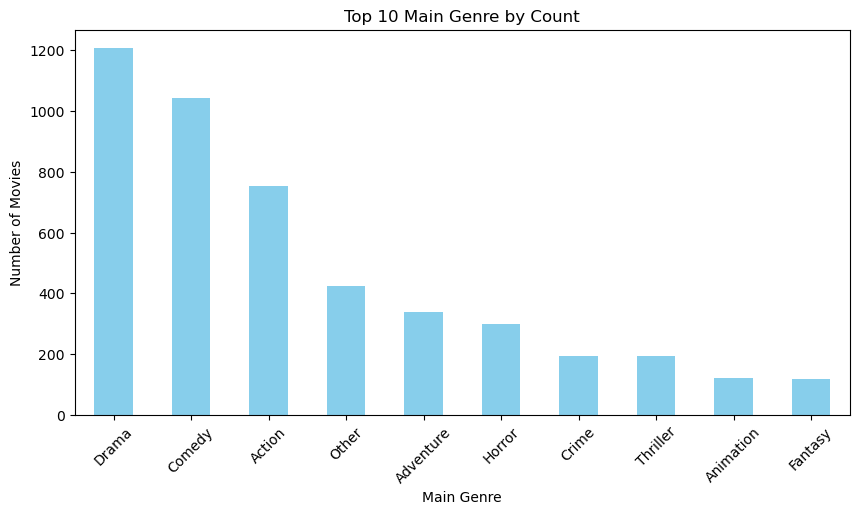

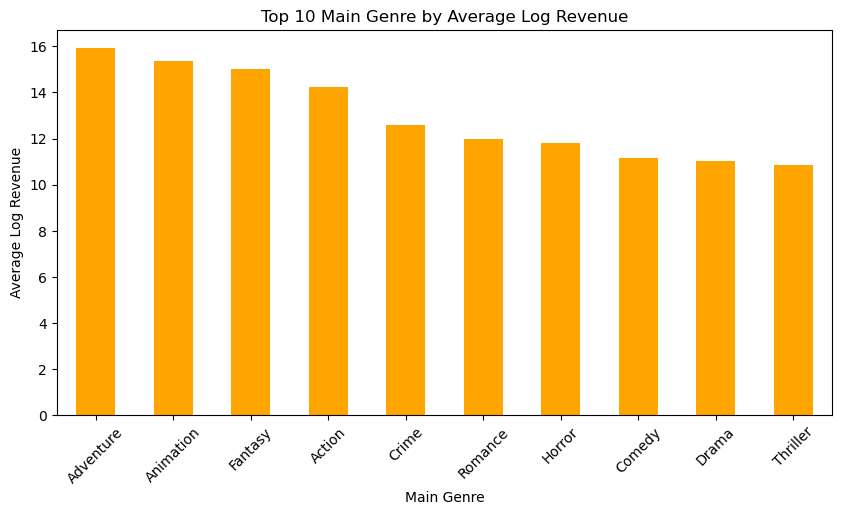

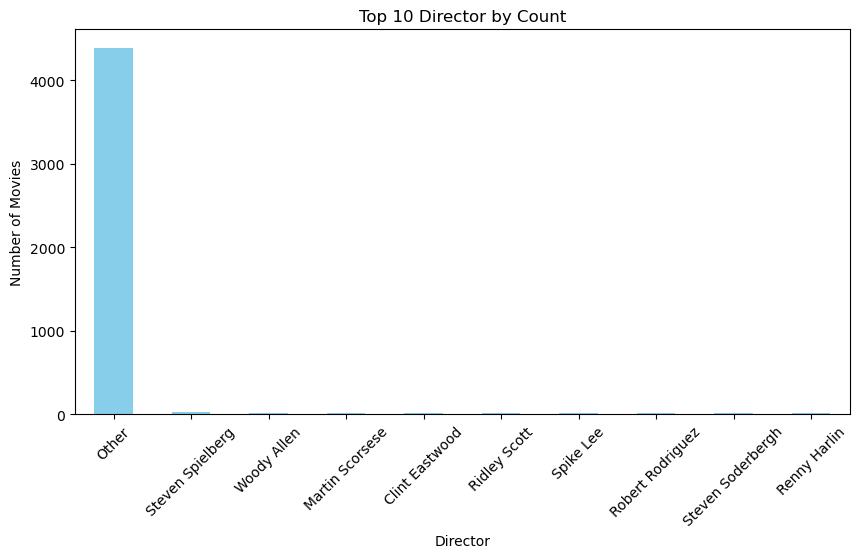

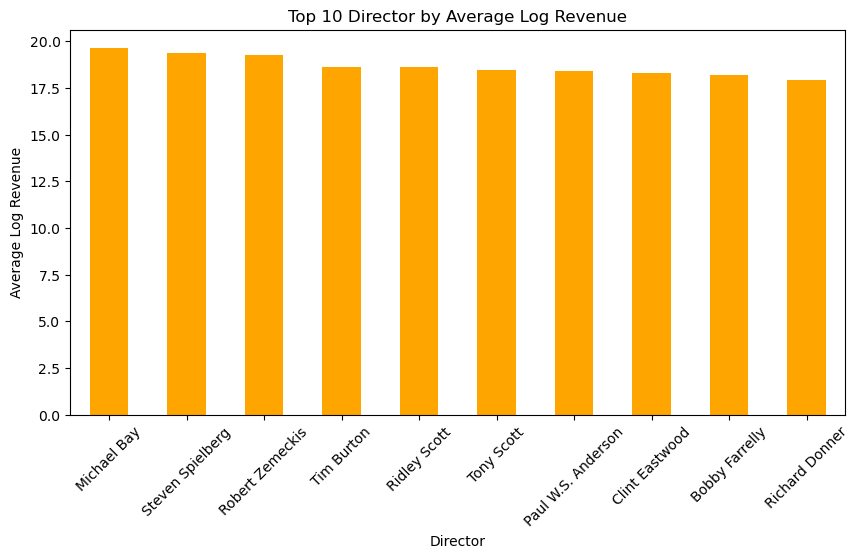

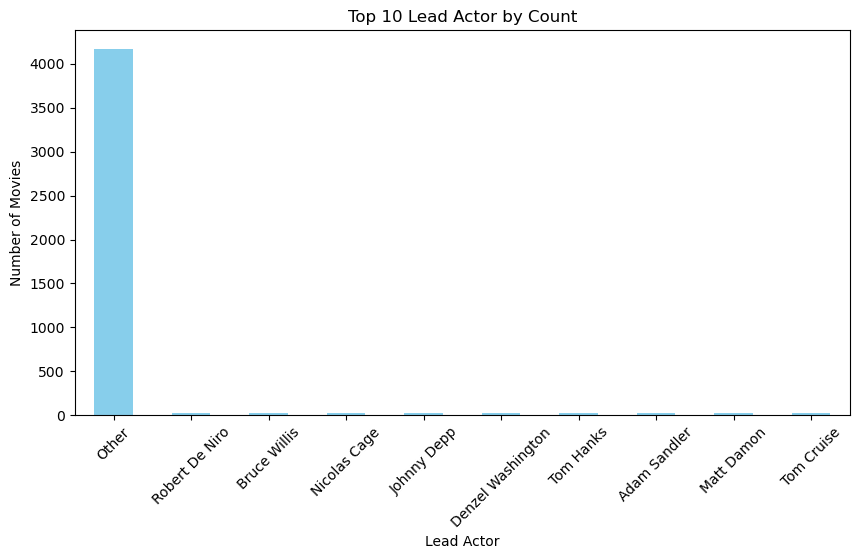

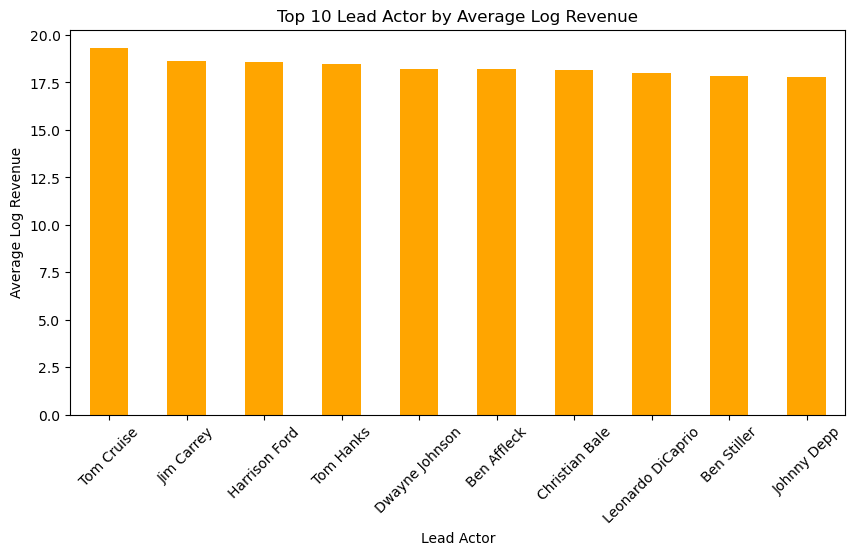

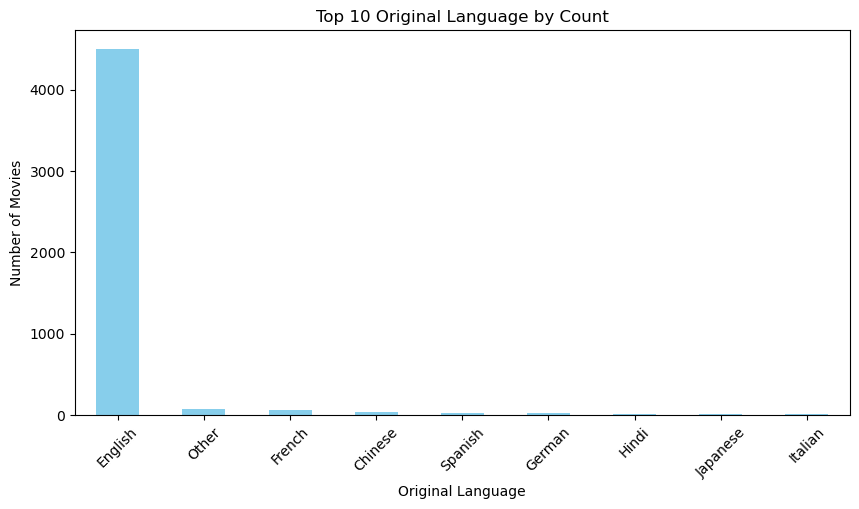

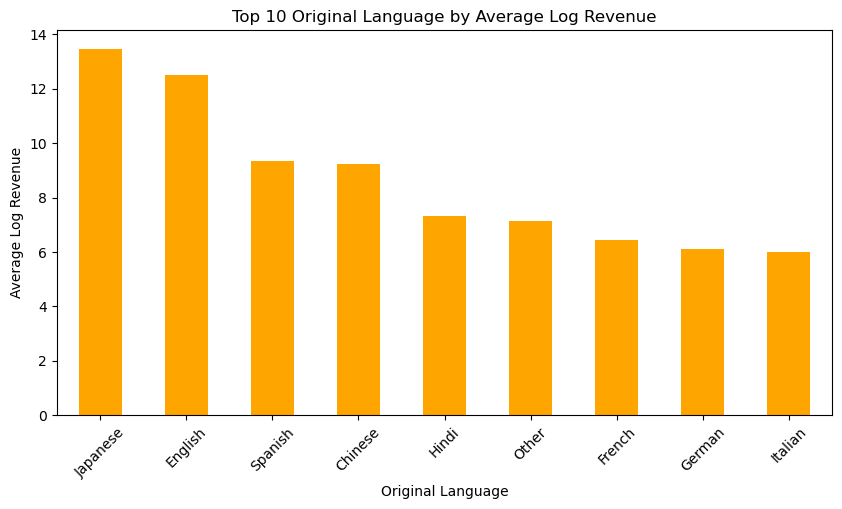

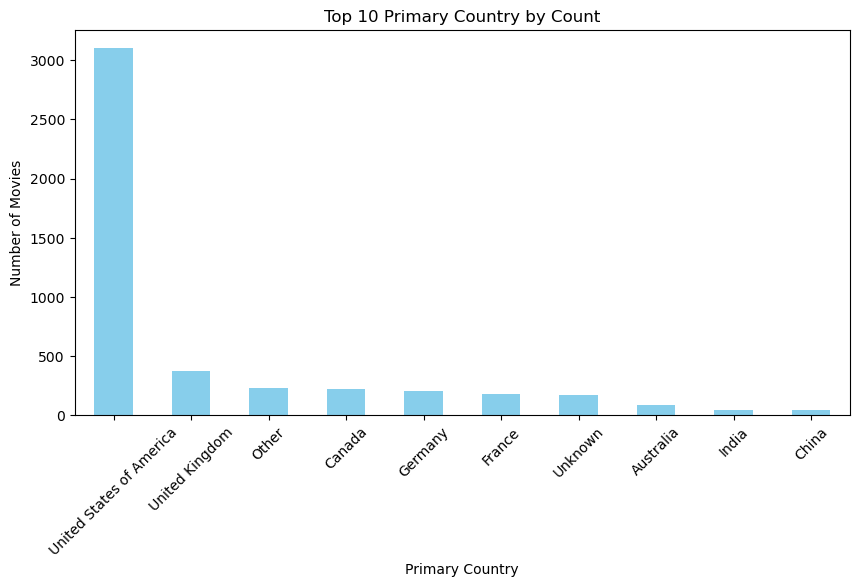

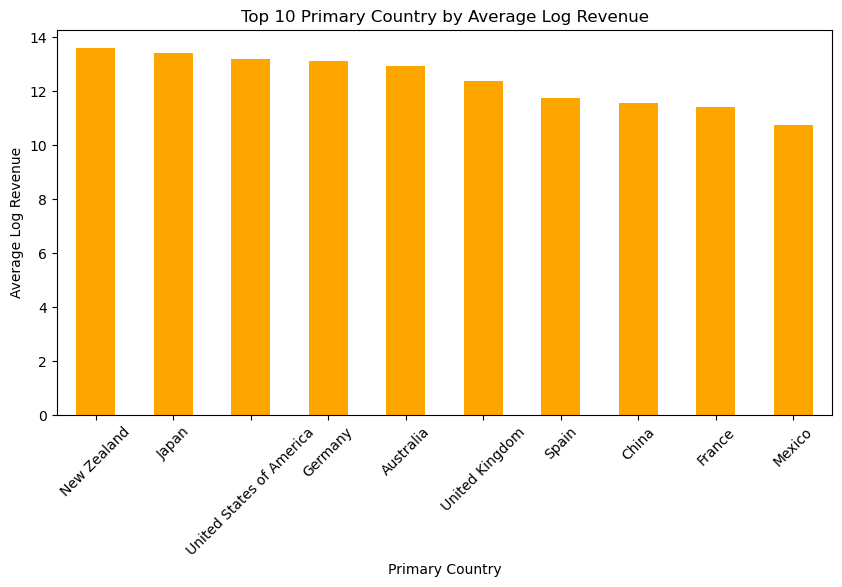

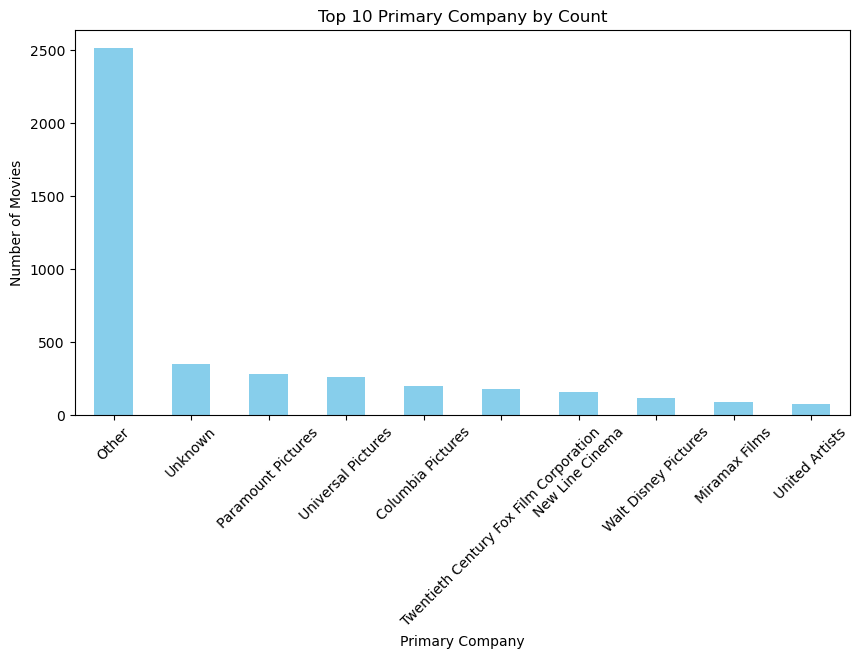

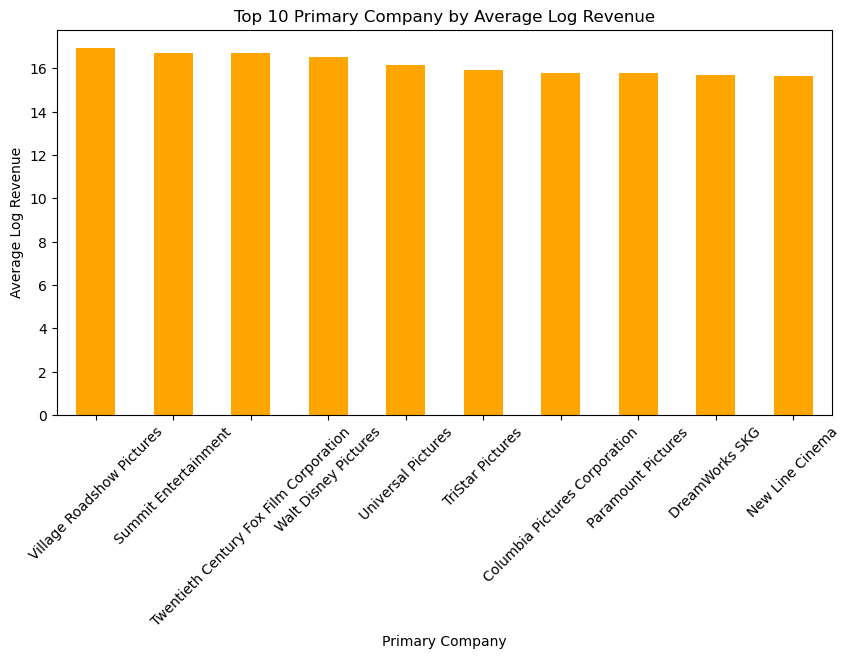

In [111]:
# Function to plot top categories by count
def plot_top_counts(df, column, top_n= 10):
    top_values = df[column].value_counts().head(top_n)
    top_values.plot(kind= "bar", color= "skyblue")
    plt.title(f"Top {top_n} {column.replace('_',' ').title()} by Count")
    plt.ylabel("Number of Movies")
    plt.xlabel(column.replace('_',' ').title())
    plt.xticks(rotation=45)
    plt.show()

# Function to plot top categories by average revenue
def plot_top_avg_revenue(df, column, top_n= 10):
    top_revenue = df.groupby(column)['log_revenue'].mean().sort_values(ascending=False).head(top_n)
    top_revenue.plot(kind='bar', color='orange')
    plt.title(f"Top {top_n} {column.replace('_',' ').title()} by Average Log Revenue")
    plt.ylabel("Average Log Revenue")
    plt.xlabel(column.replace('_',' ').title())
    plt.xticks(rotation=45)
    plt.show()

# Generate plots for each categorical column
for col in categorical_cols:
    plot_top_counts(df3, col)
    plot_top_avg_revenue(df3, col)



In [112]:

print_unique_values(df3)


 Column: main_genre
Unique values: ['Action' 'Adventure' 'Fantasy' 'Animation' 'Other' 'Drama' 'Thriller'
 'Comedy' 'Romance' 'Crime' 'Horror']
Number of Unique values: 11

 Column: director
Unique values: ['Other' 'Sam Raimi' 'Ridley Scott' 'Tim Burton' 'Michael Bay'
 'Steven Spielberg' 'Robert Zemeckis' 'Martin Scorsese' 'Oliver Stone'
 'Shawn Levy' 'Ron Howard' 'Richard Donner' 'Chris Columbus'
 'Joel Schumacher' 'Steven Soderbergh' 'Tony Scott' 'Renny Harlin'
 'Brian De Palma' 'Paul W.S. Anderson' 'Barry Levinson' 'Bobby Farrelly'
 'Clint Eastwood' 'Robert Rodriguez' 'Rob Reiner' 'Joel Coen'
 'Francis Ford Coppola' 'Spike Lee' 'John Carpenter' 'Kevin Smith'
 'Woody Allen' 'Richard Linklater']
Number of Unique values: 31

 Column: lead_actor
Unique values: ['Other' 'Johnny Depp' 'Christian Bale' 'Ben Affleck' 'Mark Wahlberg'
 'Tom Hanks' 'Brad Pitt' 'Leonardo DiCaprio' 'Harrison Ford' 'Tom Cruise'
 'Kevin Costner' 'Keanu Reeves' 'Arnold Schwarzenegger' 'Nicolas Cage'
 'Ben Stiller'

In [113]:
df3.dtypes

log_budget           float64
log_revenue          float64
release_year           int32
release_month          int32
main_genre            object
vote_average         float64
vote_count             int64
runtime              float64
director              object
lead_actor            object
original_language     object
primary_country       object
primary_company       object
dtype: object

## Encoding Categorical Variables

With the categorical features cleaned and reduced, the next step is to convert them into numerical representations suitable for machine learning models. All categorical features in this dataset are nominal, so one-hot encoding would result in very high-dimensional data. To manage dimensionality while retaining useful information, we will apply:

1. **Frequency Encoding**  
   - Columns: `main_genre`, `original_language`, `primary_country`  
   - Each category is replaced by its frequency in the dataset, preserving information about prevalence without increasing dimensionality significantly.

2. **Target Encoding**  
   - Columns: `director`, `lead_actor`, `primary_company`  
   - Each category is replaced by the mean value of the target variable (`log_revenue`) for that category.  
   - This encoding captures the relationship between categories and the target, providing more predictive power.  
   - Care will be taken to avoid data leakage when using this encoding during model training.


In [114]:
df4 = df3.copy()

In [115]:

df4.head()

,log_budget,log_revenue,release_year,release_month,main_genre,vote_average,vote_count,runtime,director,lead_actor,original_language,primary_country,primary_company
0,19.283571,21.748578,2009,12,Action,7.2,11800,162.0,Other,Other,English,United States of America,Other
1,19.519293,20.683485,2007,5,Adventure,6.9,4500,169.0,Other,Johnny Depp,English,United States of America,Walt Disney Pictures
2,19.316769,20.596199,2015,10,Action,6.3,4466,148.0,Other,Other,English,United Kingdom,Columbia Pictures
3,19.336971,20.804790,2012,7,Action,7.6,9106,165.0,Other,Christian Bale,English,United States of America,Other
4,19.376192,19.464974,2012,3,Action,6.1,2124,132.0,Other,Other,English,United States of America,Walt Disney Pictures


In [116]:
# Encoding Categorical Columns

from sklearn.model_selection import KFold

# Columns for each encoding type
freq_cols = ['main_genre', 'original_language', 'primary_country']
target_cols = ['director', 'lead_actor', 'primary_company']

# Dictionary to hold encoders
freq_maps = {}
targret_maps = {}

In [117]:
# -------------------------------
# Encoding Categorical Columns
# -------------------------------

from sklearn.model_selection import KFold

# Columns for each encoding type
freq_cols = ['main_genre', 'original_language', 'primary_country']
target_cols = ['director', 'lead_actor', 'primary_company']

# Dictionaries to save mappings
freq_maps = {}
target_maps = {}

# -------------------------------
# 1. Frequency Encoding
# -------------------------------
for col in freq_cols:
    freq_map = df3[col].value_counts(normalize=True).to_dict()
    freq_maps[col] = freq_map
    df3[col + '_freq_enc'] = df3[col].map(freq_map)

# -------------------------------
# 2. Target Encoding
# -------------------------------
# Using K-Fold strategy to reduce target leakage
kf = KFold(n_splits=5, shuffle=True, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for col in target_cols:
    # Initialize
    df4[col + '_target_enc'] = 0
    
    # Save global mean per category for inference
    temp_map = df4.groupby(col)['log_revenue'].mean().to_dict()
    target_maps[col] = temp_map
    
    # K-Fold target encoding
    for train_idx, val_idx in kf.split(df4):
        train_data = df4.iloc[train_idx]
        val_data = df4.iloc[val_idx]
        
        fold_map = train_data.groupby(col)['log_revenue'].mean().to_dict()
        
        # Assign using loc with the correct index
        df4.loc[val_data.index, col + '_target_enc'] = val_data[col].map(fold_map)

# -------------------------------
# Columns now:
# freq encoded: main_genre_freq_enc, original_language_freq_enc, primary_country_freq_enc
# target encoded: director_target_enc, lead_actor_target_enc, primary_company_target_enc
# Original columns remain for reference or inference
# -------------------------------

print("Frequency maps saved for:", list(freq_maps.keys()))
print("Target maps saved for:", list(target_maps.keys()))


Frequency maps saved for: ['main_genre', 'original_language', 'primary_country']
Target maps saved for: ['director', 'lead_actor', 'primary_company']


C:\Users\HomePC\AppData\Local\Temp\ipykernel_28632\2527970881.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[11.78091451 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 14.06152656 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 19.51777968 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451
 19.51777968 11.78091451 19.29302674 11.78091451 18.260928   11.78091451
 11.78091451 19.64113251 11.78091451 11.78091451 11.78091451 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451
 11.78091451 15.85119536 11.78091451 18.260928   11.78091451 11.78091451
 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451 11.78091451

In [118]:
df4.head()

,log_budget,log_revenue,release_year,release_month,main_genre,vote_average,vote_count,runtime,director,lead_actor,original_language,primary_country,primary_company,director_target_enc,lead_actor_target_enc,primary_company_target_enc
0,19.283571,21.748578,2009,12,Action,7.2,11800,162.0,Other,Other,English,United States of America,Other,11.859885,11.461789,11.232873
1,19.519293,20.683485,2007,5,Adventure,6.9,4500,169.0,Other,Johnny Depp,English,United States of America,Walt Disney Pictures,11.827291,18.478424,15.968680
2,19.316769,20.596199,2015,10,Action,6.3,4466,148.0,Other,Other,English,United Kingdom,Columbia Pictures,11.827291,11.490336,15.614723
3,19.336971,20.804790,2012,7,Action,7.6,9106,165.0,Other,Christian Bale,English,United States of America,Other,11.820747,18.021264,11.144648
4,19.376192,19.464974,2012,3,Action,6.1,2124,132.0,Other,Other,English,United States of America,Walt Disney Pictures,11.820747,11.514831,16.535449


In [119]:
df4.director_target_enc.describe()

count    4802.000000
mean       12.221202
std         1.502058
min         7.682644
25%        11.820747
50%        11.827291
75%        11.893857
max        19.786637
Name: director_target_enc, dtype: float64

In [120]:
df4.dtypes

log_budget                    float64
log_revenue                   float64
release_year                    int32
release_month                   int32
main_genre                     object
vote_average                  float64
vote_count                      int64
runtime                       float64
director                       object
lead_actor                     object
original_language              object
primary_country                object
primary_company                object
director_target_enc           float64
lead_actor_target_enc         float64
primary_company_target_enc    float64
dtype: object

In [121]:
df4.columns

Index(['log_budget', 'log_revenue', 'release_year', 'release_month',
       'main_genre', 'vote_average', 'vote_count', 'runtime', 'director',
       'lead_actor', 'original_language', 'primary_country', 'primary_company',
       'director_target_enc', 'lead_actor_target_enc',
       'primary_company_target_enc'],
      dtype='object')

## Feature Selection (Dropping Unneeded Columns)

At this stage, the dataset contains both the original categorical features and their encoded counterparts (frequency and target encodings).  
Since the encoded features already capture the information from the categorical variables, the original versions are no longer needed for modeling.  

We will now drop the following columns:
- **main_genre**  
- **director**  
- **lead_actor**  
- **original_language**  
- **primary_country**  
- **primary_company**

The resulting dataset will only retain the numerical, encoded, and target variables necessary for training.


In [122]:
# drop unneeded columns
columumns_to_drop = [
    "main_genre", 
    "director", 
    "lead_actor", 
    "original_language", 
    "primary_country", 
    "primary_company"
]

df5 = df4.drop(columns= columumns_to_drop)
df5.head()

,log_budget,log_revenue,release_year,release_month,vote_average,vote_count,runtime,director_target_enc,lead_actor_target_enc,primary_company_target_enc
0,19.283571,21.748578,2009,12,7.2,11800,162.0,11.859885,11.461789,11.232873
1,19.519293,20.683485,2007,5,6.9,4500,169.0,11.827291,18.478424,15.968680
2,19.316769,20.596199,2015,10,6.3,4466,148.0,11.827291,11.490336,15.614723
3,19.336971,20.804790,2012,7,7.6,9106,165.0,11.820747,18.021264,11.144648
4,19.376192,19.464974,2012,3,6.1,2124,132.0,11.820747,11.514831,16.535449


In [123]:
df5.dtypes

log_budget                    float64
log_revenue                   float64
release_year                    int32
release_month                   int32
vote_average                  float64
vote_count                      int64
runtime                       float64
director_target_enc           float64
lead_actor_target_enc         float64
primary_company_target_enc    float64
dtype: object

## Feature Correlation Analysis

Before training models, it is important to explore how the engineered features correlate with the target variable `log_revenue`.  
- This helps identify strong predictors.  
- It also highlights potential multicollinearity between features.  

We will calculate Pearson correlations and visualize them using a heatmap.


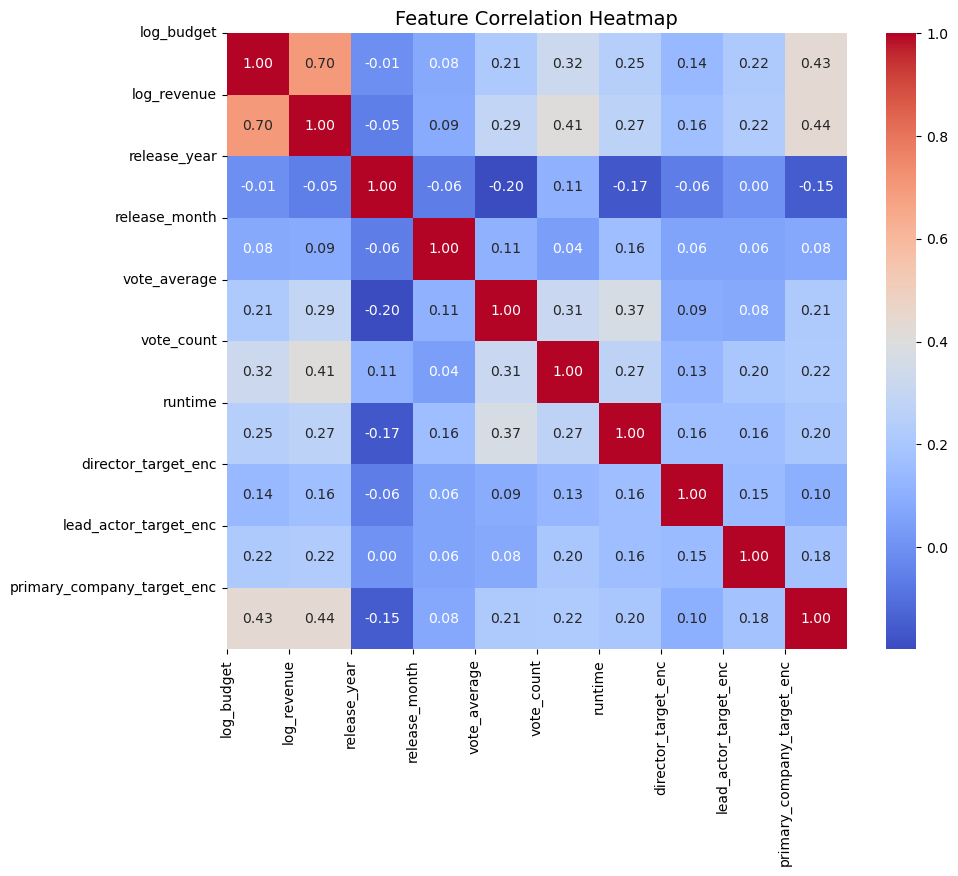

log_revenue                   1.000000
log_budget                    0.699688
primary_company_target_enc    0.437859
vote_count                    0.408686
vote_average                  0.290013
runtime                       0.265177
lead_actor_target_enc         0.224245
director_target_enc           0.164893
release_month                 0.086058
release_year                 -0.054650
Name: log_revenue, dtype: float64


In [124]:
corr = df5.corr(numeric_only= True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# Display top correlations with target
corr_target = corr["log_revenue"].sort_values(ascending=False)
print(corr_target)

## Phase: Train-Test Split

With the cleaned and feature-engineered dataset ready, the next step is to split it into **training** and **testing** sets.  
- The **training set** will be used to fit the machine learning models.  
- The **testing set** will be used to evaluate model performance on unseen data.  

We will use an 80/20 split (80% for training, 20% for testing) to balance learning and evaluation.  


In [125]:
from sklearn.model_selection import train_test_split

X = df5.drop(columns=['log_revenue'])
y = df5['log_revenue']

# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3841, 9)
Testing set shape: (961, 9)


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

print("R2: ", round(r2, 4))
print("MSE: ", round(mse, 4))
print("RMSE: ", round(rmse, 4))
print("MAE: ", round(mae, 4))



R2:  0.5422
MSE:  30.3926
RMSE:  5.5129
MAE:  3.8932


using stats model

In [127]:
import statsmodels.api as sm


In [128]:

import statsmodels.formula.api as smf


model = smf.ols("log_revenue ~ log_budget + release_year + release_month + vote_average + vote_count + runtime + director_target_enc + lead_actor_target_enc + primary_company_target_enc", data=df5).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     662.0
Date:                Tue, 26 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:44:32   Log-Likelihood:                -14952.
No. Observations:                4802   AIC:                         2.992e+04
Df Residuals:                    4792   BIC:                         2.999e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

ANOVA for the multiple linear regression

In [129]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                   sum_sq      df            F        PR(>F)
log_budget                   72741.764152     1.0  2448.527103  0.000000e+00
release_year                   254.548723     1.0     8.568248  3.436854e-03
release_month                   25.611062     1.0     0.862082  3.532034e-01
vote_average                  1343.429855     1.0    45.220575  1.966475e-11
vote_count                    6604.002566     1.0   222.294296  3.563818e-49
runtime                         39.726292     1.0     1.337208  2.475845e-01
director_target_enc            373.357583     1.0    12.567418  3.962788e-04
lead_actor_target_enc          362.149129     1.0    12.190135  4.847621e-04
primary_company_target_enc    3857.429073     1.0   129.843148  1.066282e-29
Residual                    142362.538464  4792.0          NaN           NaN


## Phase Conclusion: Baseline OLS Regression and ANOVA

In this phase, we fitted an Ordinary Least Squares (OLS) regression model using
our engineered and encoded features. The model achieved the following key metrics:

- **R²**: 0.554 → About 55% of the variance in `log_revenue` is explained by our predictors.  
- **MSE**: 30.39  
- **RMSE**: 5.51  
- **MAE**: 3.89  

The **OLS summary** highlighted that predictors such as `log_budget`, `vote_average`, 
`vote_count`, and the target-encoded features (`director_target_enc`, 
`lead_actor_target_enc`, `primary_company_target_enc`) had statistically significant 
relationships with `log_revenue`.

The **ANOVA results** confirmed these findings:
- Strong significance (**p < 0.001**) for `log_budget`, `vote_average`, `vote_count`, 
  and company/cast-related encodings.  
- Weak or no significance for `release_month` and `runtime`, suggesting they may have 
  limited predictive value in this linear setting.

Overall, OLS provided a strong baseline model with interpretable coefficients and 
statistical significance testing. However, the relatively modest R² suggests that 
non-linear models (e.g., Random Forest, Gradient Boosting, XGBoost) may capture 
additional variance. These will be explored in the next phase with 
GridSearchCV and cross-validation for model comparison.


# Model Selection Using GridSearchCV

This project applies **GridSearchCV** to compare and optimize different regression models for predictive performance.  
The models under consideration include:

- **Linear Regression**  
- **Ridge Regression**  
- **Lasso Regression**  
- **Random Forest Regressor**  
- **XGBoost Regressor**  
- **Gradient Boosting Regressor**

The goal is to identify the best-performing model and its optimal hyperparameters based on the **R-squared (R²) score** using cross-validation.  
This ensures a fair evaluation across models while preventing overfitting and improving generalization.


In [138]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import make_scorer, mean_squared_error
import time

In [146]:
def find_best_using_gridsearchcv(X_train, y_train):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': np.logspace(-4, 4, 10)
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': np.logspace(-4, 1, 10)
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [None, 5, 10],
                'max_features': ['sqrt', 'log2']
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.6, 0.8, 1.0]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
                'subsample': [0.6, 0.8, 1.0]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='r2', return_train_score=False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    results_df.to_csv("gridsearch_results.csv", index=False)
    return results_df

In [147]:
find_best_using_gridsearchcv(X_train, y_train)


,model,best_score,best_params
0,linear_regression,0.549019,"{'fit_intercept': True, 'positive': False}"
1,ridge,0.549019,{'alpha': 0.0001}
2,lasso,0.549019,{'alpha': 0.0001}
3,random_forest,0.627199,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e..."
4,xgboost,0.628963,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
5,gradient_boosting,0.629286,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


## GridSearchCV Results

The results from the hyperparameter tuning using **GridSearchCV** are summarized below:

| Model               | Best R² Score | Best Parameters                                                                 |
|---------------------|---------------|---------------------------------------------------------------------------------|
| Linear Regression   | 0.5490        | {'fit_intercept': True, 'positive': False}                                      |
| Ridge Regression    | 0.5490        | {'alpha': 0.0001}                                                               |
| Lasso Regression    | 0.5490        | {'alpha': 0.0001}                                                               |
| Random Forest       | 0.6272        | {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}                    |
| XGBoost Regressor   | 0.6290        | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}    |
| Gradient Boosting   | 0.6293        | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}    |

### Key Insights
- **Linear, Ridge, and Lasso** performed similarly with R² ≈ 0.549, showing limited improvement from regularization.  
- **Random Forest** improved performance significantly (R² ≈ 0.626).  
- **XGBoost** achieved the highest score (R² ≈ 0.629), slightly outperforming Gradient Boosting.  
- The results suggest that **tree-based ensemble methods** capture the underlying relationships in the data better than linear models.  

**Best Model:** XGBoost Regressor with optimal parameters.
